# Simulation8

**Mengqi Liu**

**Aug 25, 2023**
___

 ## Recap
 - $N$: number of samples one time.
 - $M$: number of bins.
 - H0: $X\perp \!\!\! \perp Y \mid Z$, H1: $X\not \! \perp \!\!\! \perp Y \mid Z$
 - Methods:
   ($\tilde{Z}$ is the discretized $Z$, and the data belonging to the same group share the same $\tilde{Z}$.)
   - "double_Z": regress $Y$ on $\tilde{Z}$ and regress $X$ on $1,\tilde{Z}$ separately. Take the *absolute* correlation between residuals from two linear regressions as the test statistic.
   - "double_meanZ": regress $Y$ on $Z$ and regress $X$ on $1,Z$ separately. Take the *absolute* correlation between residuals from two linear regressions as the test statistic.
   - "noZ": use $cor(X,Y)$ as test statistic with local permutation in $X$ with respect to $Z$.


- $\alpha=0.05$

- $X = f_x(Z) + \epsilon$, $Y = f_y(Z) + \epsilon$

- Noise $\epsilon$:
  - various $a$
  - H0:
    - normal: $N(Z, a)$
    - skewed_normal: $N(Z, a)$
- $N=100, Z\sim \textrm{Unif}([0,1))$, $M \in \{2, 5, 10, 16, 25, 50\}$.

 ___
 - When $X|Z$ and $Y|Z$ are both non-smooth, we expect two methods to fail. However, sometimes "double_Z" or both methods work. -> sensitive to variance & model.
 - When exactly one of $X|Z$ and $Y|Z$ is smooth and another one is not, "double_meanZ" and "noZ" always valid in type-1 error control while "double_Z" sometimes fails.
 - Using information of $Z$(both "double_Z" and "double_meanZ") will improve power.
 - <font color=#008000 >We could try different correlation measure(the one in original paper, Spearman's, Chatterjee's, ...)</font>
 - <font color=#008000 >Change the way to use information of $Z$</font>
 - <font color=#008000 >Permute residuals?</font> It seems that permuting residuals with $Z$ have better type-I control compared to permuting data with $Z$ (when $Y$ is linear in $Z$). But I don't think it's a generally better way as the method basically remove some information of $Z$ and may introduce some pseudo correlation due to $Z$ on the other hand.
 ___

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

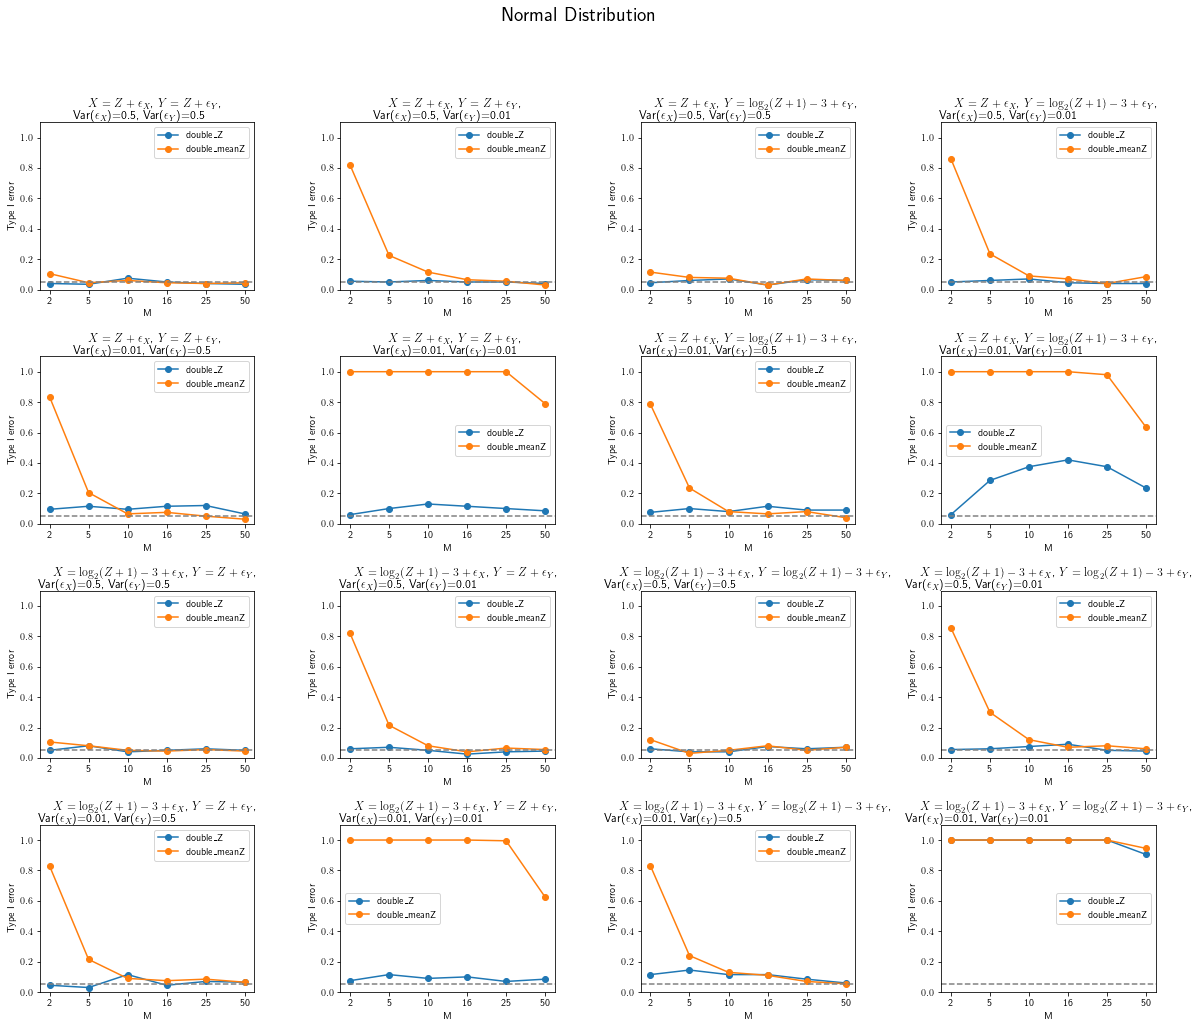

In [5]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$']
yfuns = ['$Y = Z + \epsilon_Y$', '$Y = \log_2(Z+1)-3  + \epsilon_Y$']
plt.figure(figsize=(20, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_5_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

 ## Permute residuals:

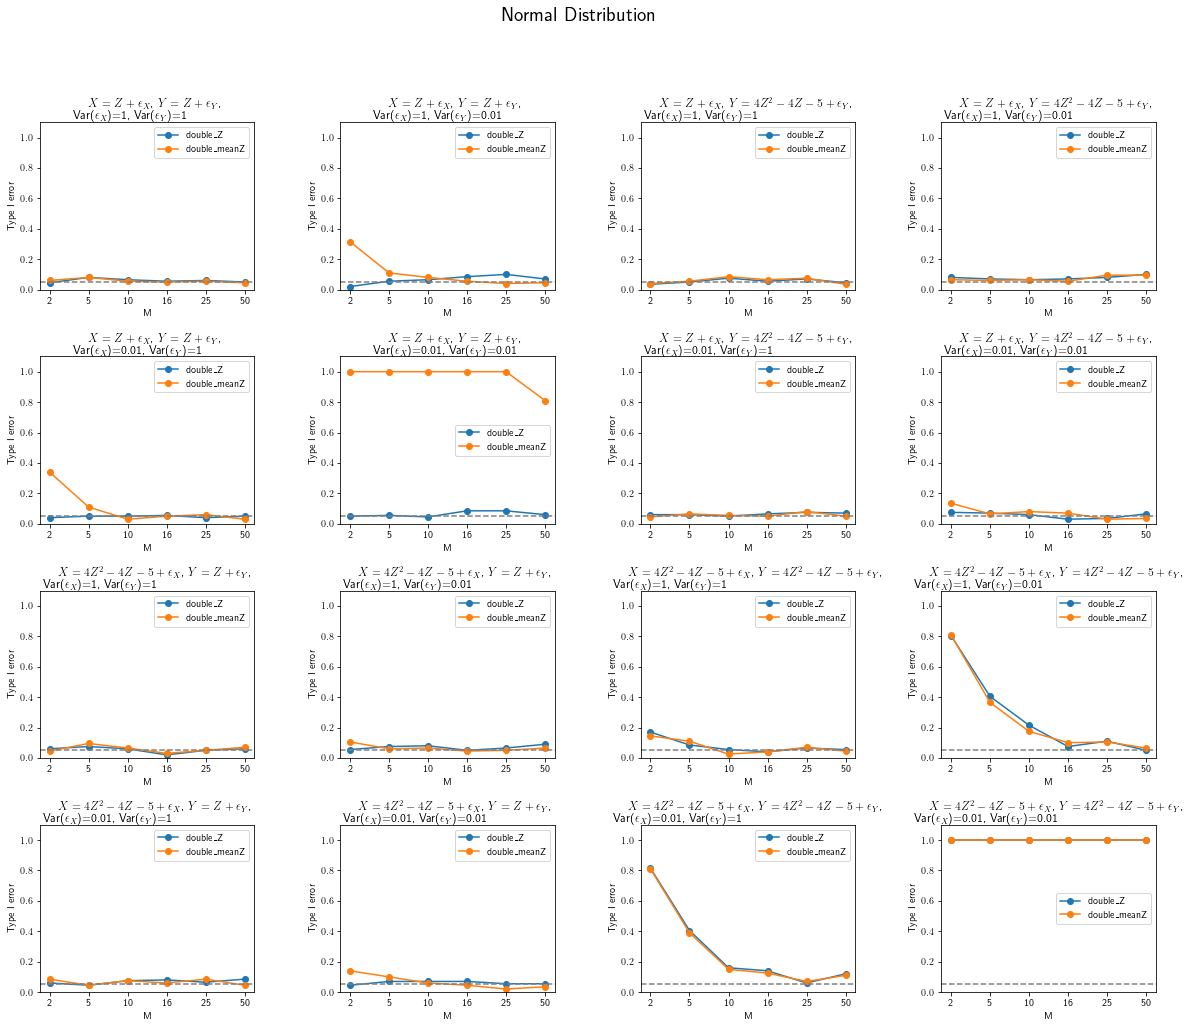

In [15]:
types = "normal"
hs = 'h0'
vxs = [1, 0.01]
vys = [1, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$']
yfuns = ['$Y = Z + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5  + \epsilon_Y$']
plt.figure(figsize=(20, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_m21_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

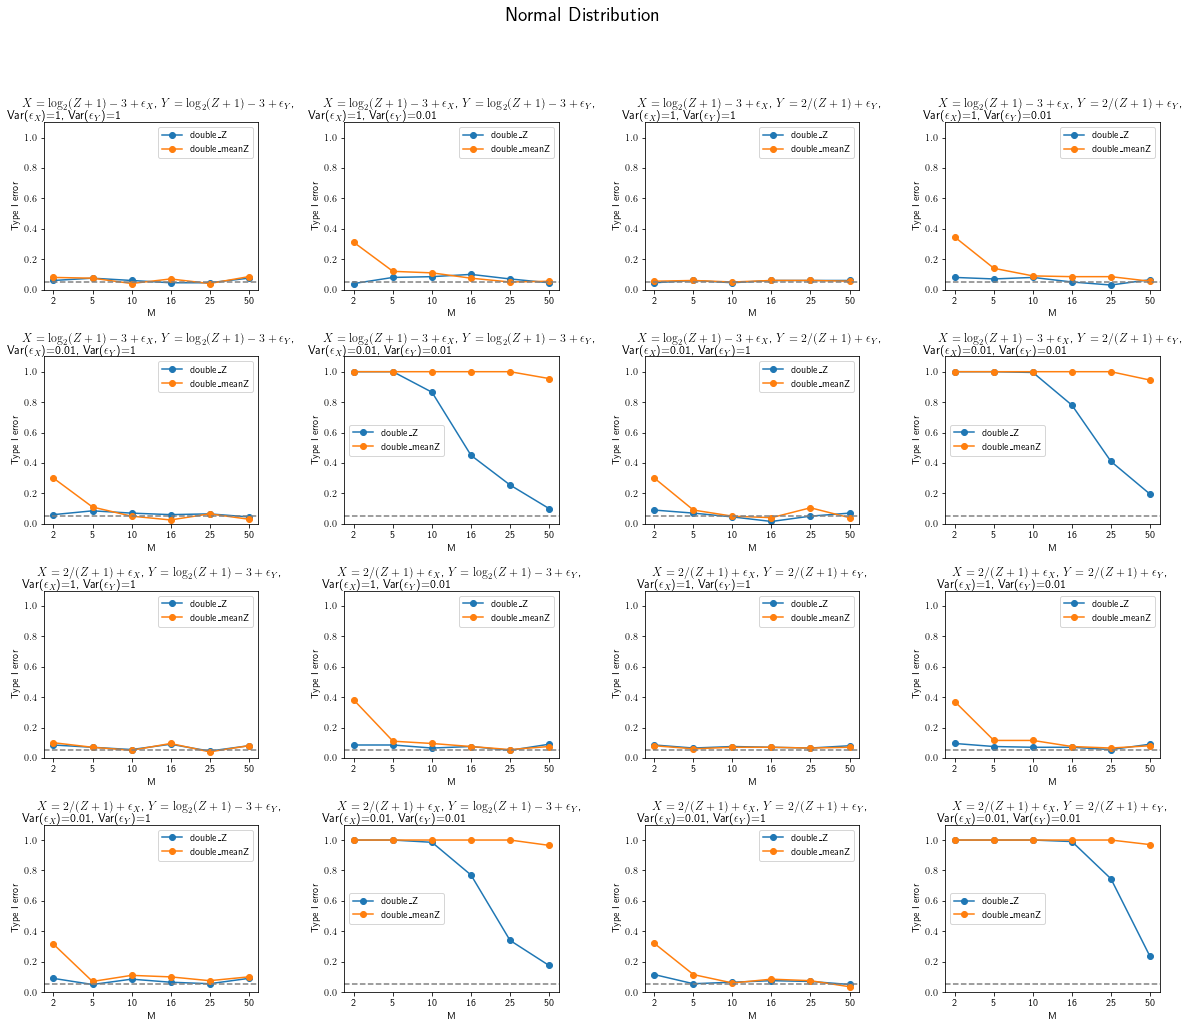

In [13]:
types = "normal"
hs = 'h0'
vxs = [1, 0.01]
vys = [1, 0.01]
xfuns = ['$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1) + \epsilon_Y$']
plt.figure(figsize=(20, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_m22_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

## Compare powers


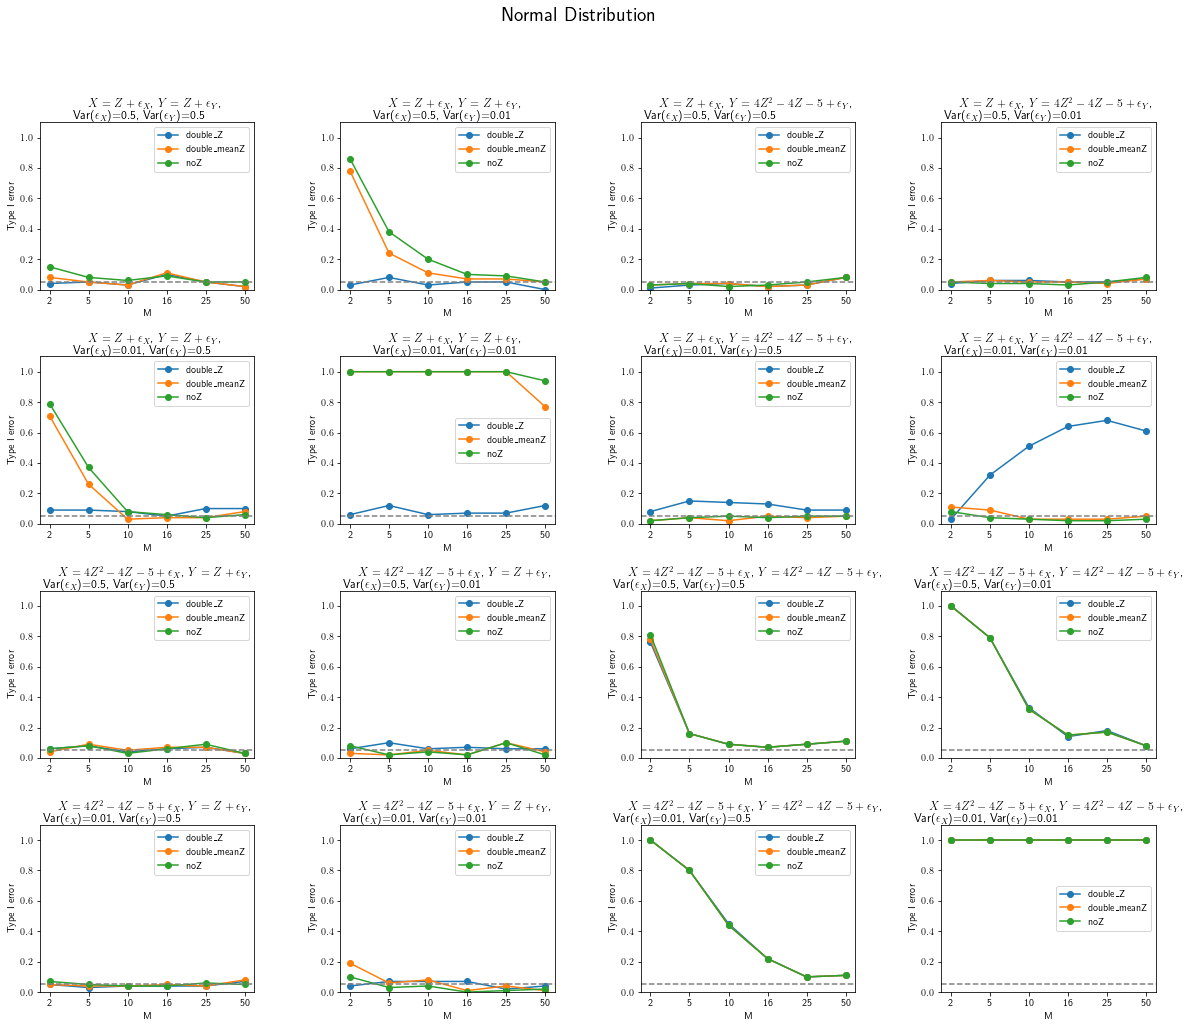

In [188]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$']
yfuns = ['$Y = Z + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5  + \epsilon_Y$']
plt.figure(figsize=(20, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_8_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

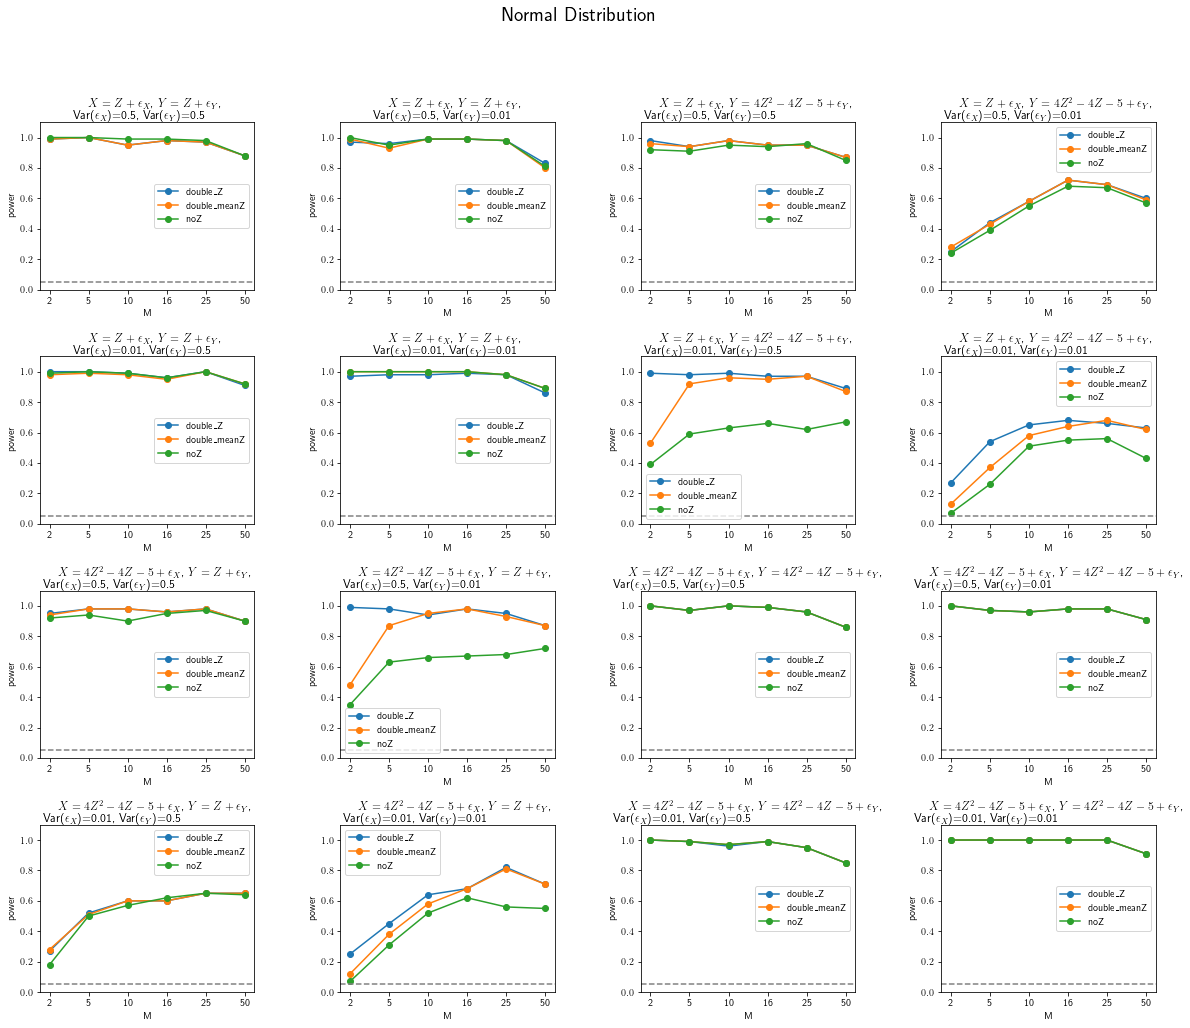

In [171]:
types = "normal"
hs = 'h1'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$']
yfuns = ['$Y = Z + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5  + \epsilon_Y$']
plt.figure(figsize=(20, 16))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(2):
    for yf in range(2):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(4, 4, xf*8+vx1*4+yf*2+vy1+1)
                result = pd.read_csv("./results/result_8_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

 -  More nonlinear functions:

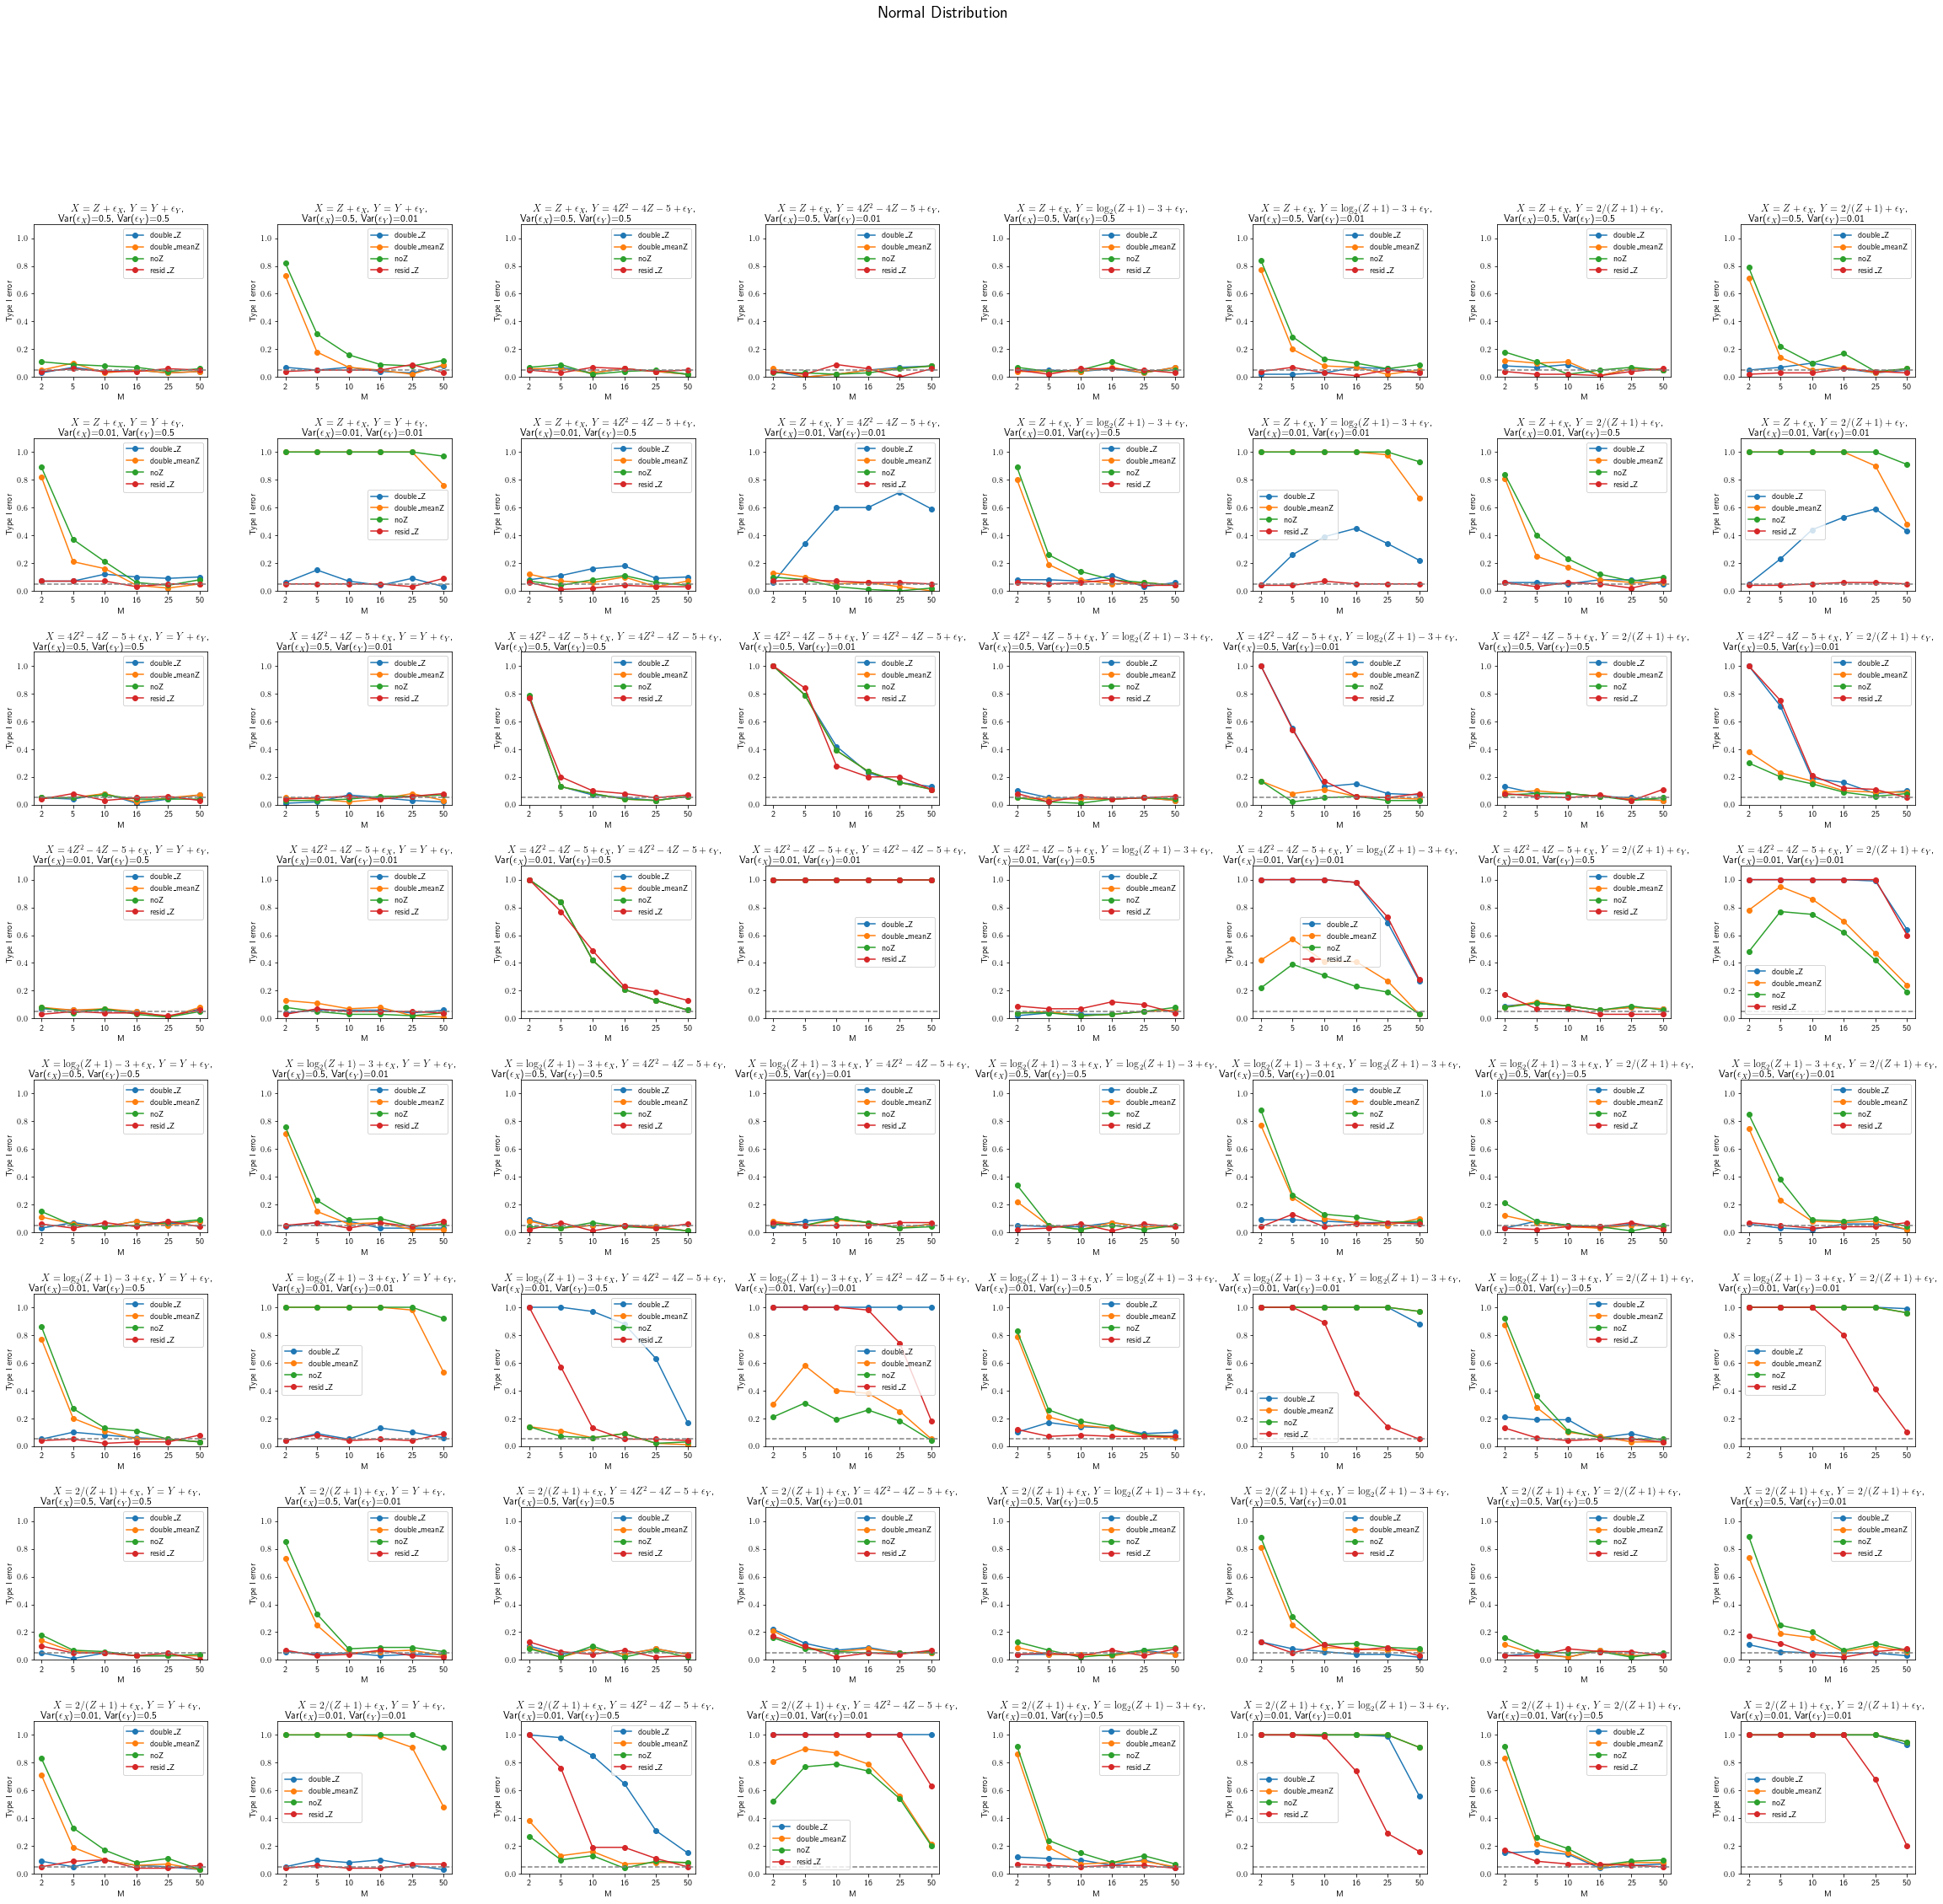

In [5]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(40, 36))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xff in range(4):
    xf = xff + 1 if xff < 3 else 0
    for yff in range(4):
        yf = yff + 1 if yff < 3 else 0
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(8, 8, xf*16+vx1*8+yf*2+vy1+1)
                result1 = pd.read_csv("./results/result_9_x_func_"+str(xff)+"_"+str(yff)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result2 = pd.read_csv("./results/result_m29_x_func_"+str(xff)+"_"+str(yff)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = pd.concat([result1, result2], axis=0).iloc[:-1,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

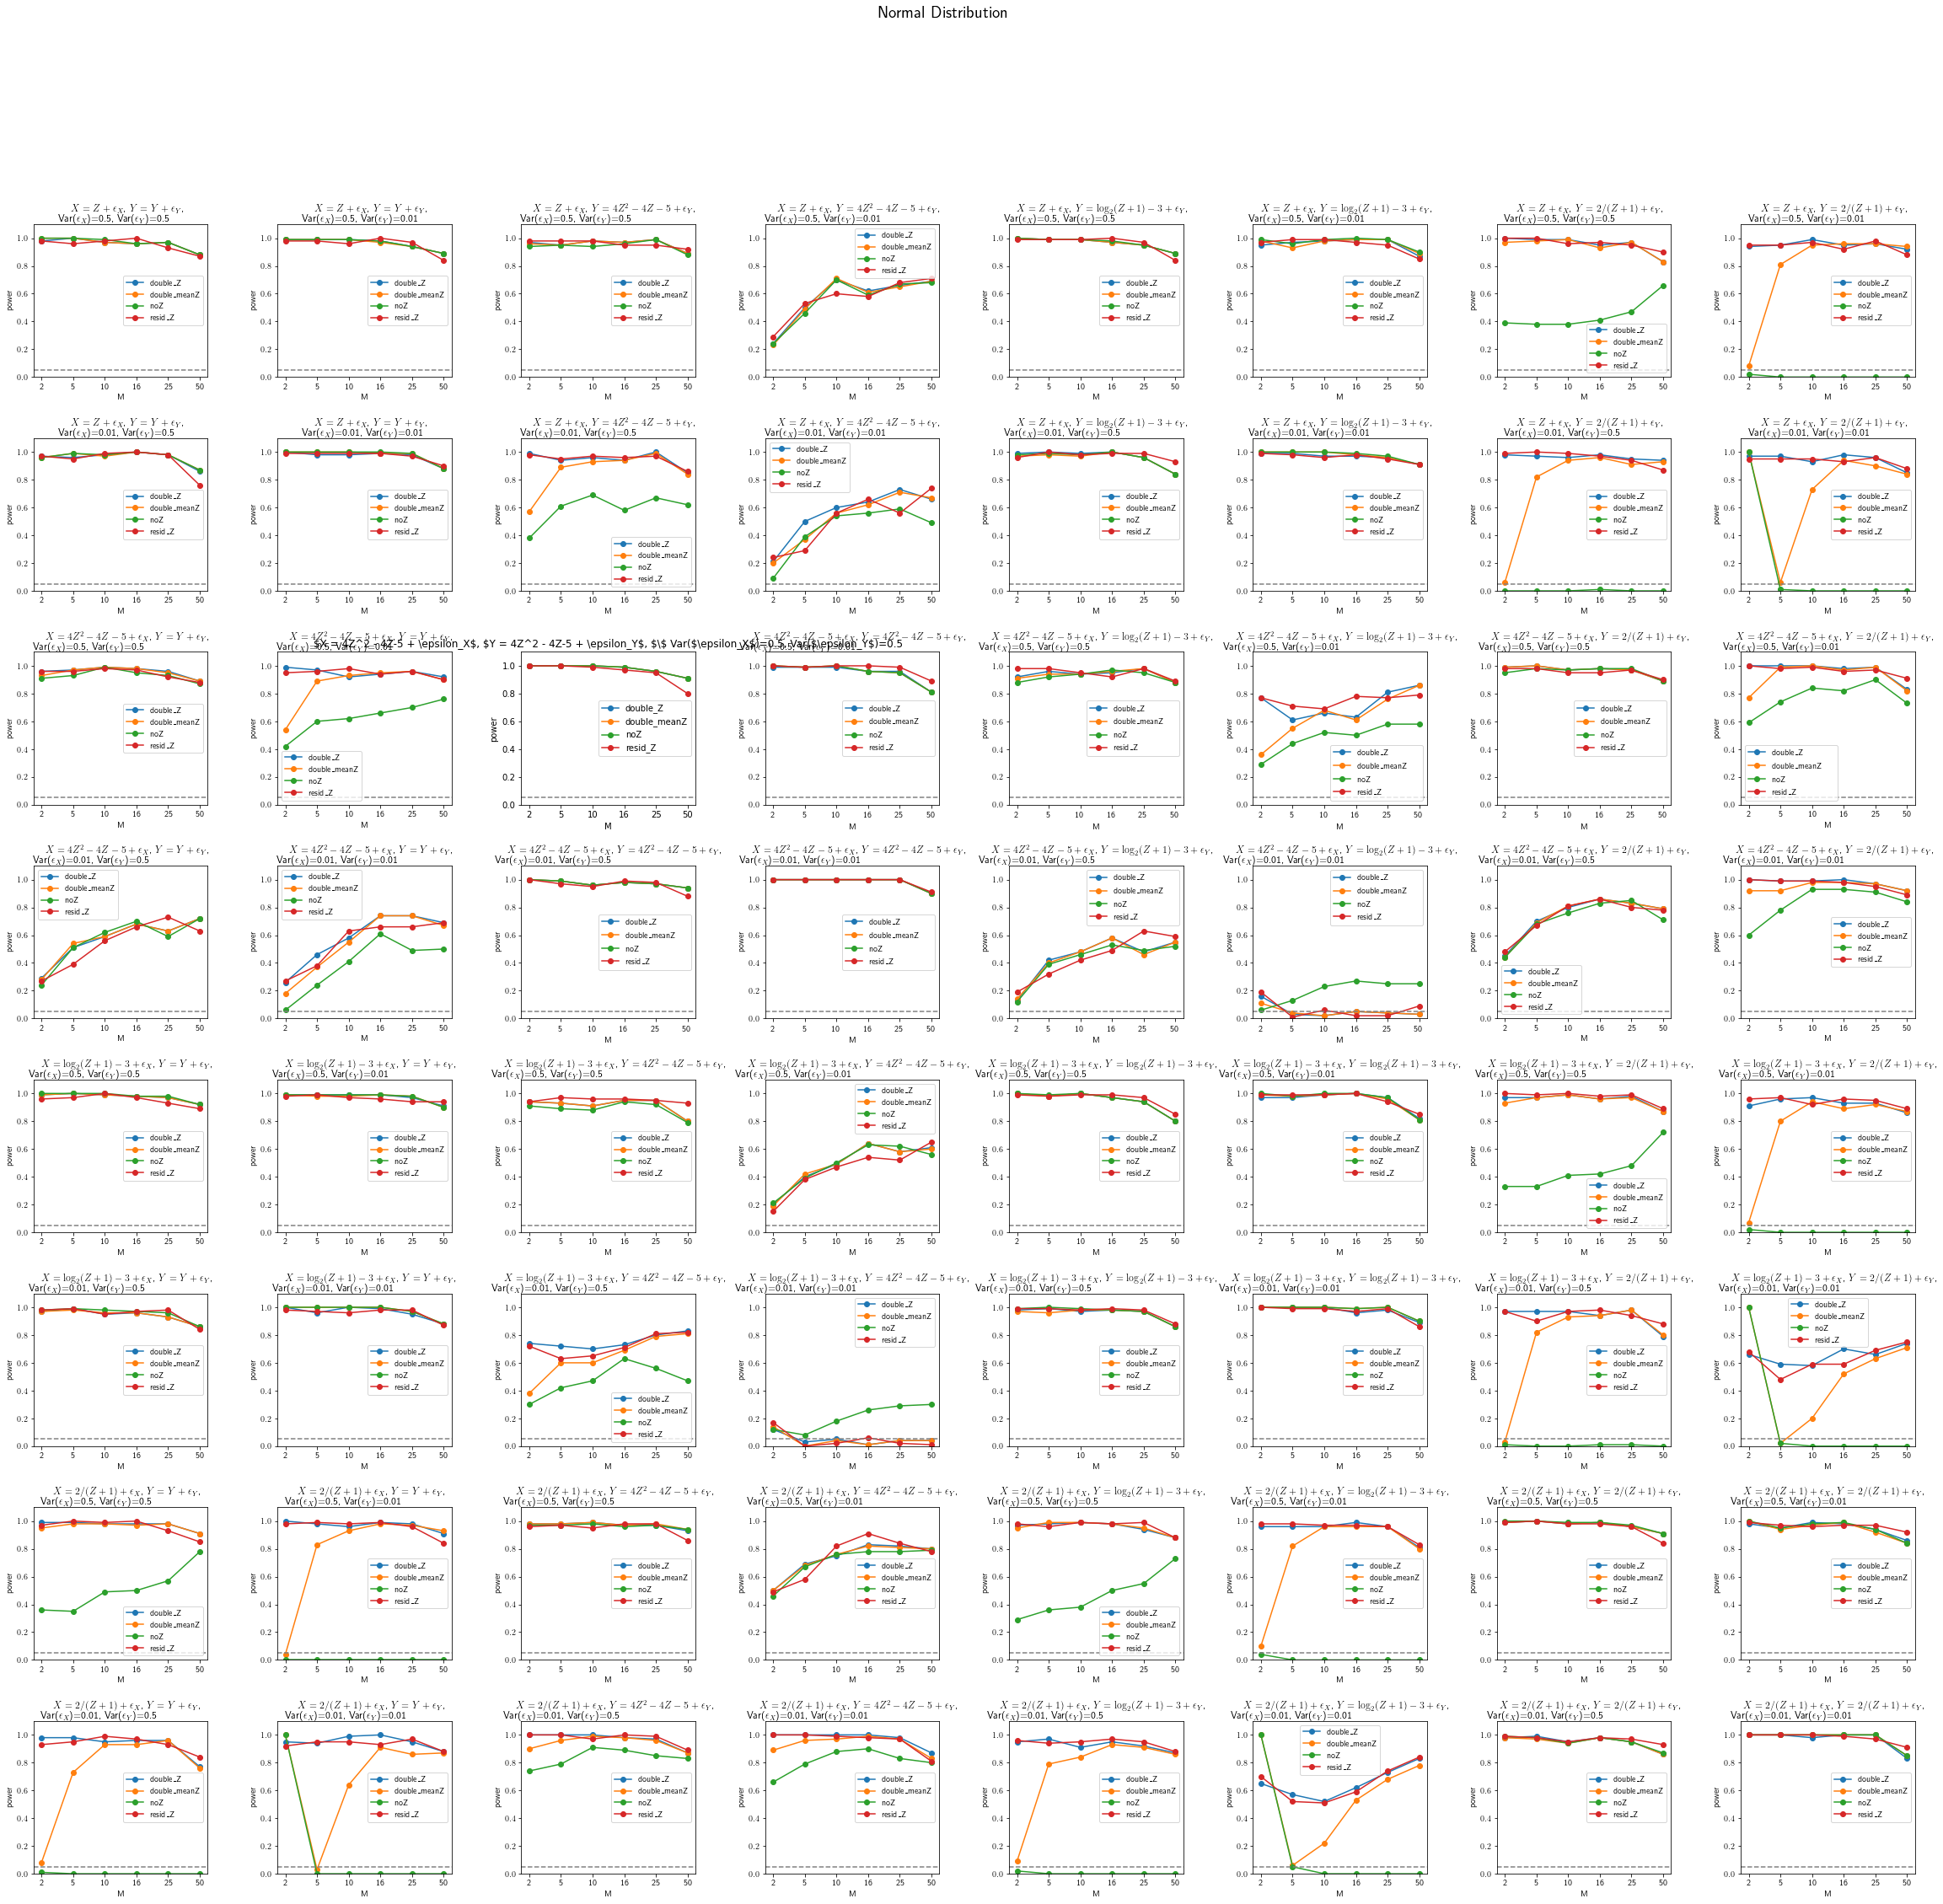

In [2]:
types = "normal"
hs = 'h1'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(40, 36))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xff in range(4):
    xf = xff+1 if xff < 3 else 0
    for yff in range(4):
        yf = yff + 1 if yff < 3 else 0
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(8, 8, xf*16+vx1*8+yf*2+vy1+1)
                result1 = pd.read_csv("./results/result_9_x_func_"+str(xff)+"_"+str(yff)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result2 = pd.read_csv("./results/result_m29_x_func_"+str(xff)+"_"+str(yff)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = pd.concat([result1, result2], axis=0).iloc[:-1,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

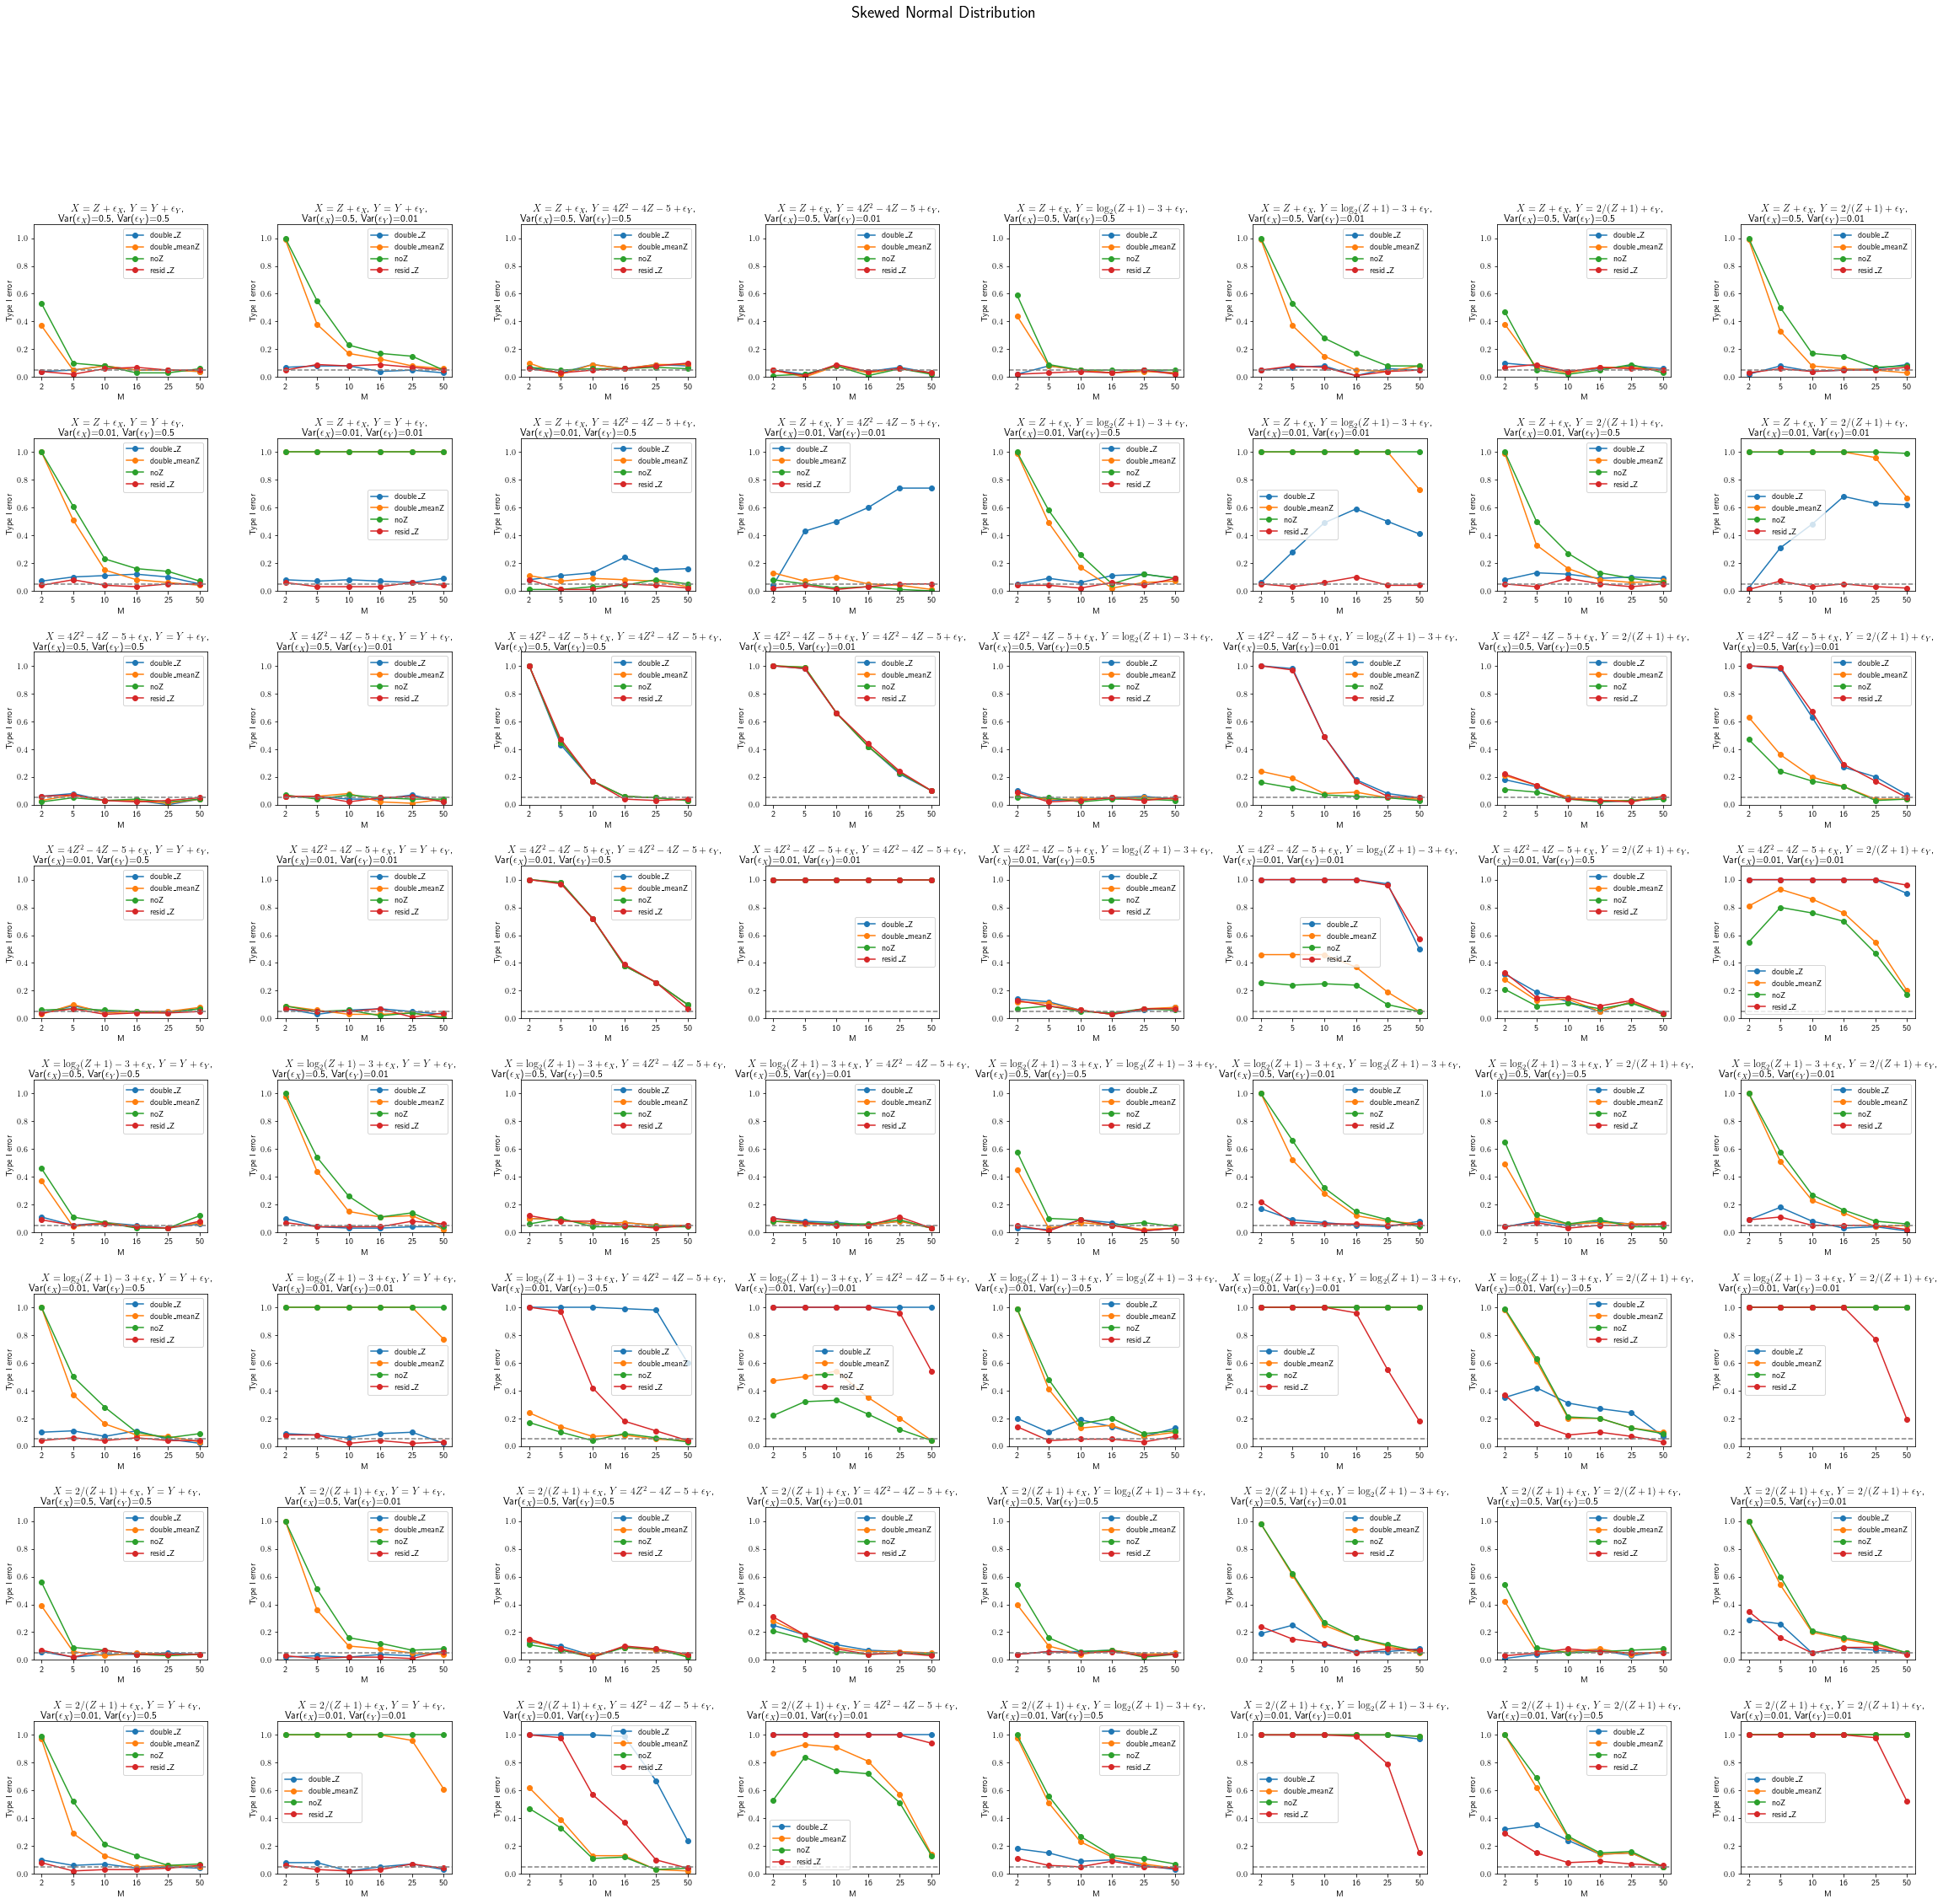

In [5]:
types = "skewed_normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(40, 36))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(4):
    for yf in range(4):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(8, 8, xf*16+vx1*8+yf*2+vy1+1)
                result = pd.read_csv("./results/result_10_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Skewed Normal Distribution", fontsize=20)
plt.show()

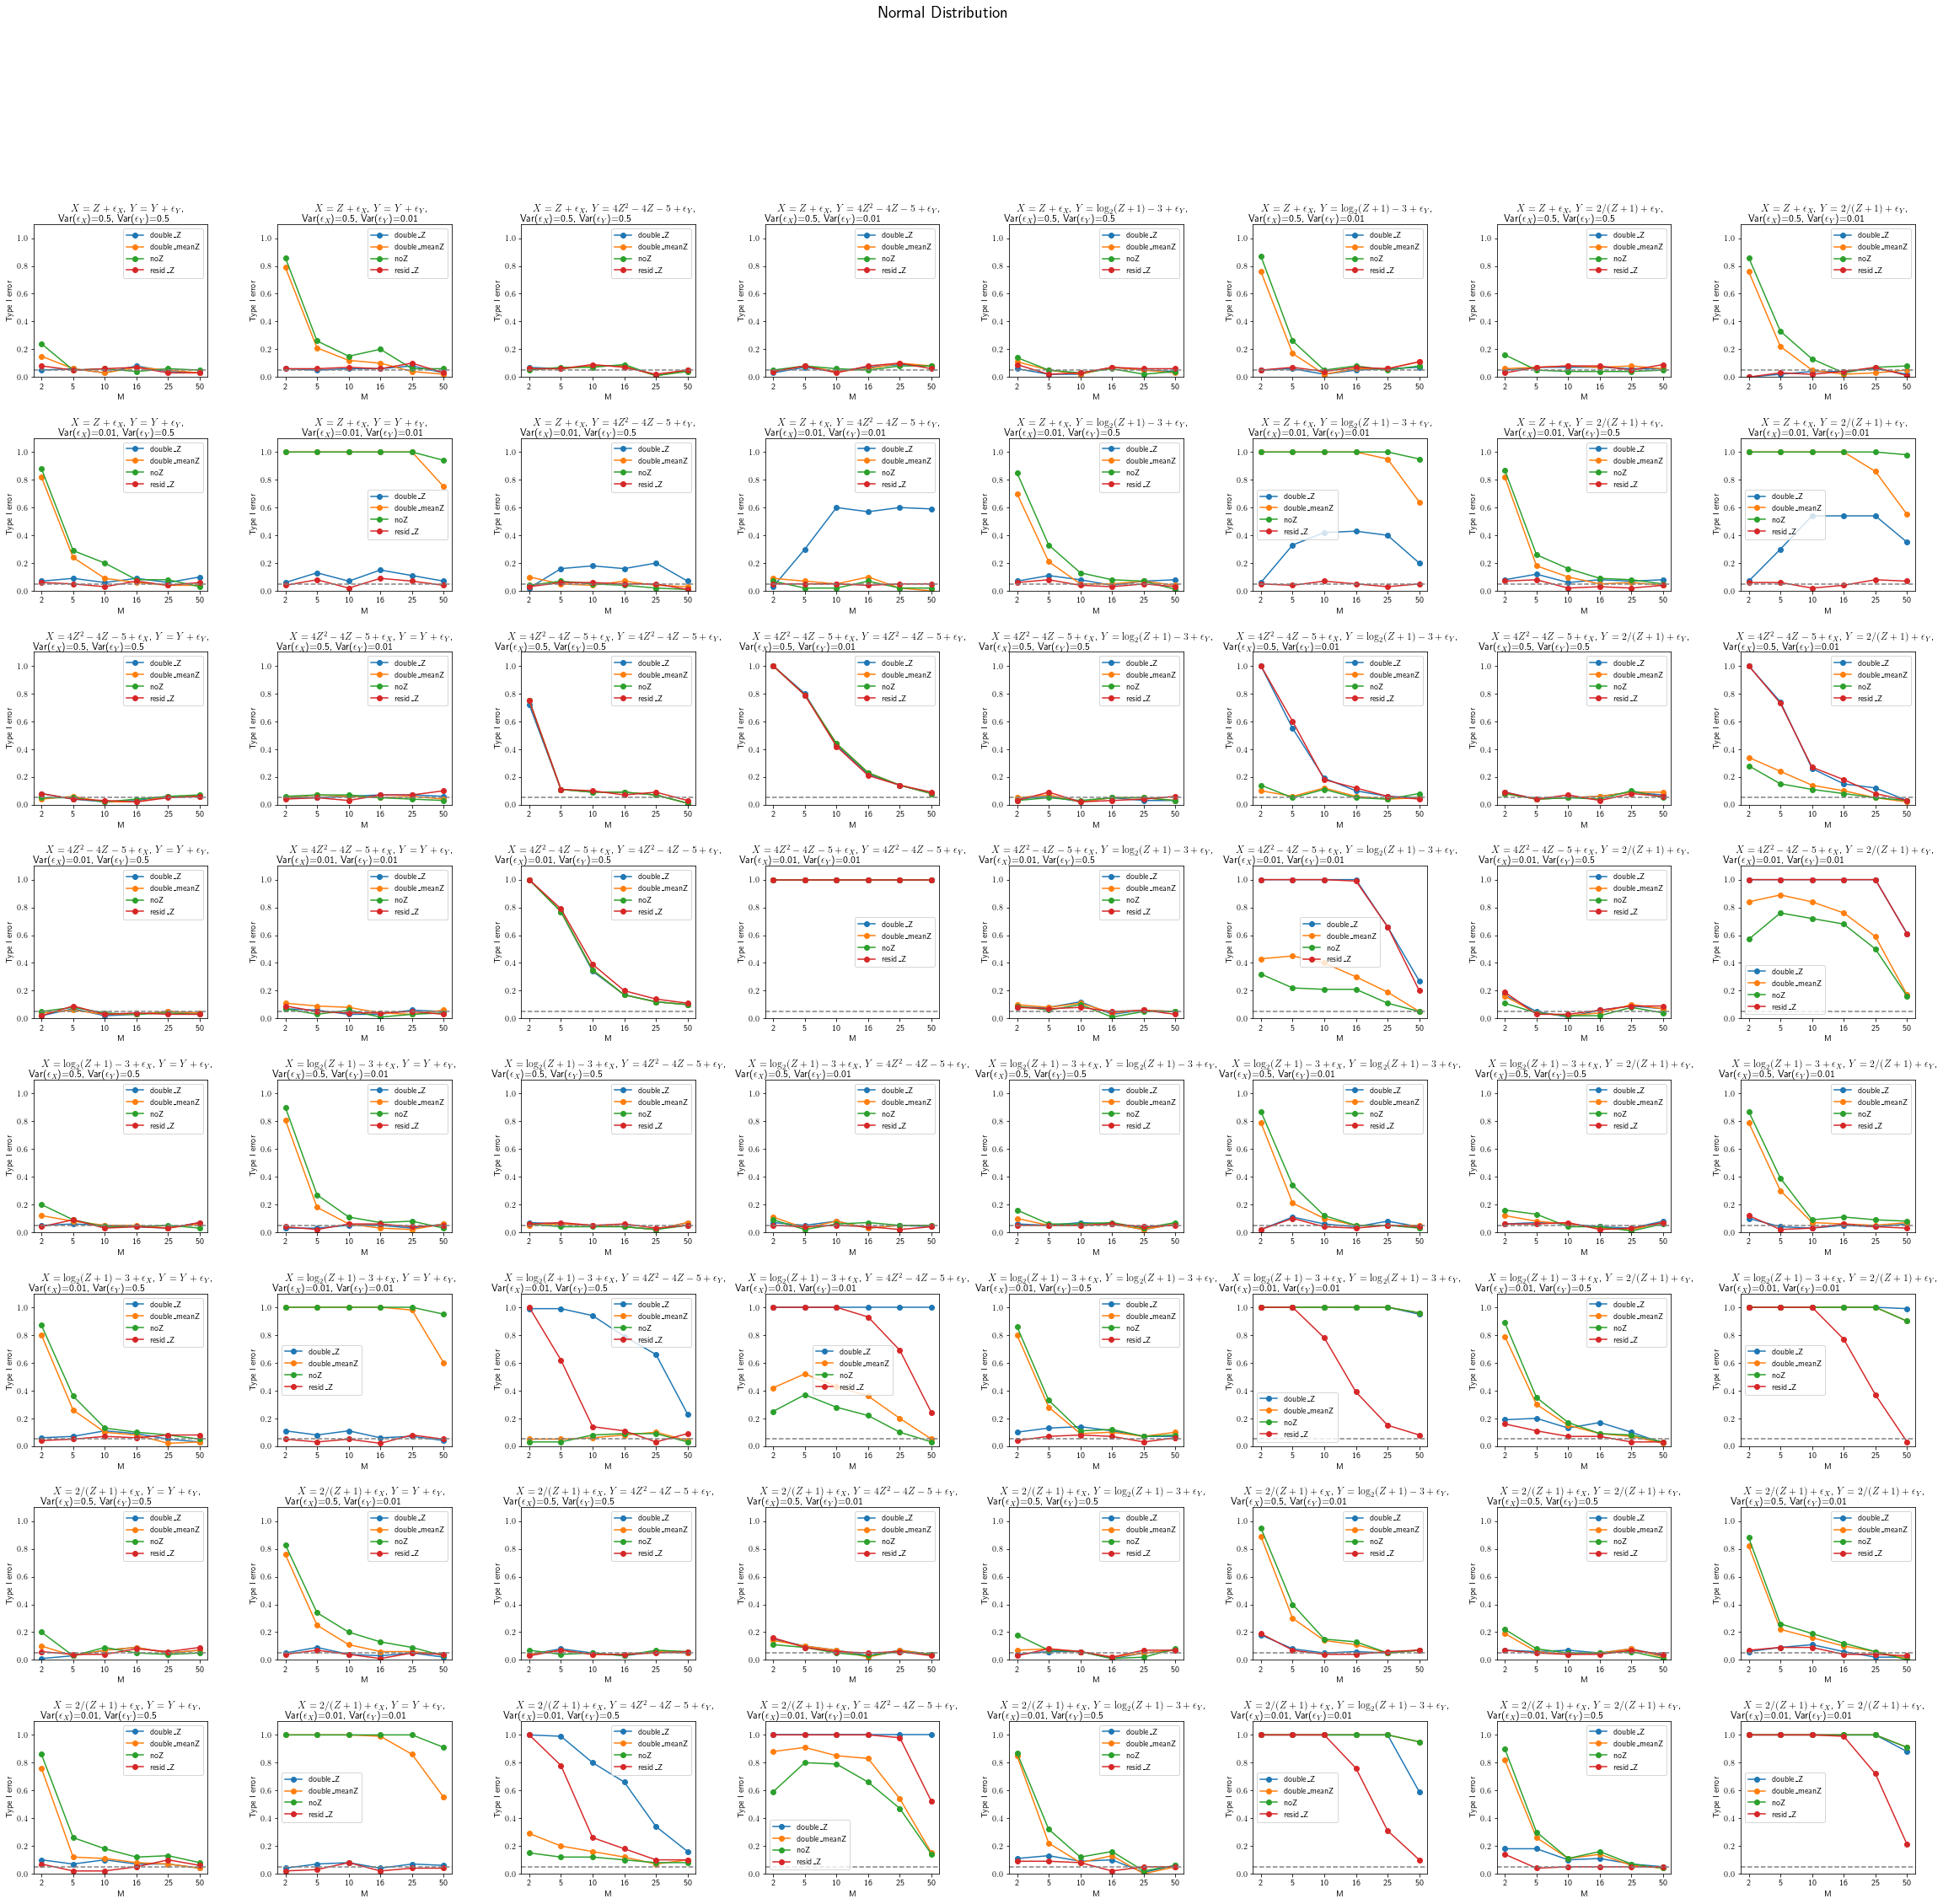

In [10]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(40, 36))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(4):
    for yf in range(4):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(8, 8, xf*16+vx1*8+yf*2+vy1+1)
                result = pd.read_csv("./results/result_10_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

___
## Other statistics:

 - Methods:
   ($\tilde{Z}$ is the discretized $Z$, and the data belonging to the same group share the same $\tilde{Z}$.)
   - "linear_y_zmean": regress $Y$ on $1,X,\tilde{Z}$ and take the *absolute* coefficient of $X$ as the test statistic.
   - "linear_x_zmean": regress $X$ on $1,Y,\tilde{Z}$ and take the *absolute* coefficient of $Y$ as the test statistic.
   - "linear_y_z": regress $Y$ on $1,X,Z$ and take the *absolute* coefficient of $X$ as the test statistic.
   - "linear_x_z": regress $X$ on $1,Y,Z$ and take the *absolute* coefficient of $Y$ as the test statistic.
   - "linear_y":  regress $Y$ on $1,X$ and take the *absolute* coefficient of $X$ as the test statistic.
   - "linear_x": regress $X$ on $1,Y$ and take the *absolute* coefficient of $Y$ as the test statistic.

___
 - "linear_x_..." will have valid type-I error control while "linear_y_z" will fail when $X|Z$ is non-smooth. (reason?)
 - Not using information $Z$ will lose some information when $M$ is small.
___

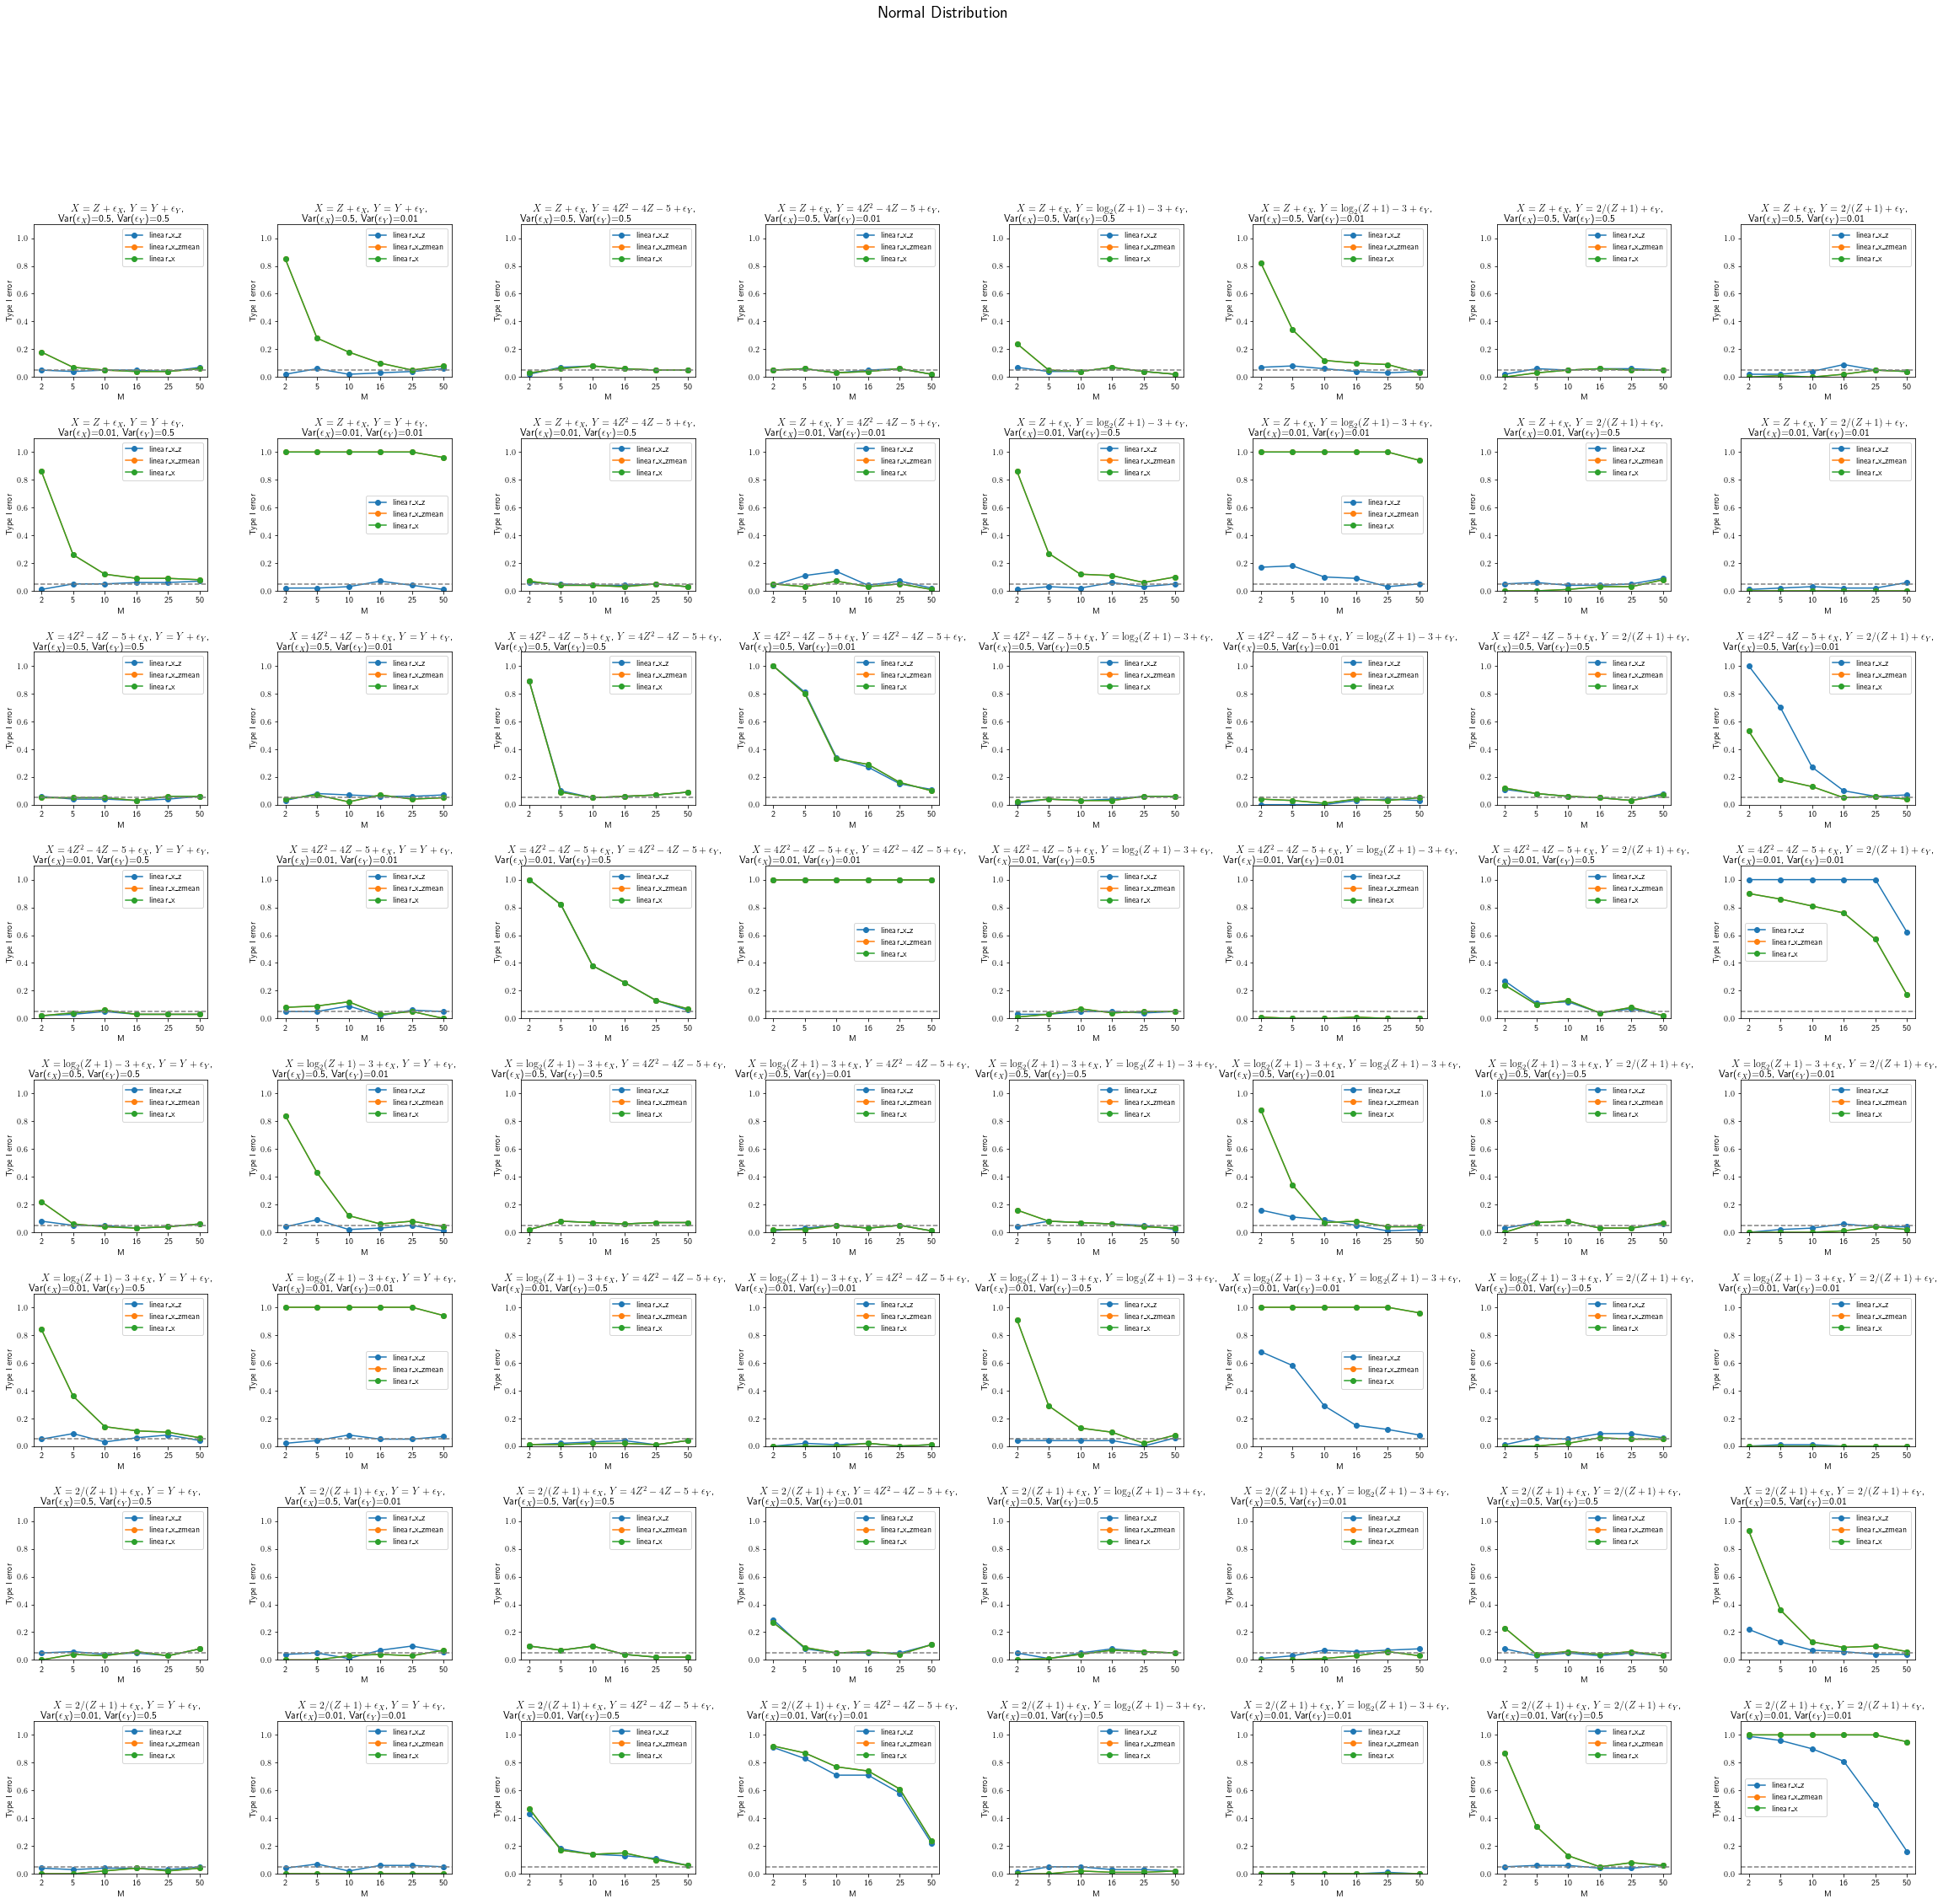

In [47]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(40, 36))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(4):
    for yf in range(4):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(8, 8, xf*16+vx1*8+yf*2+vy1+1)
                result = pd.read_csv("./results/result_m32_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:3,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

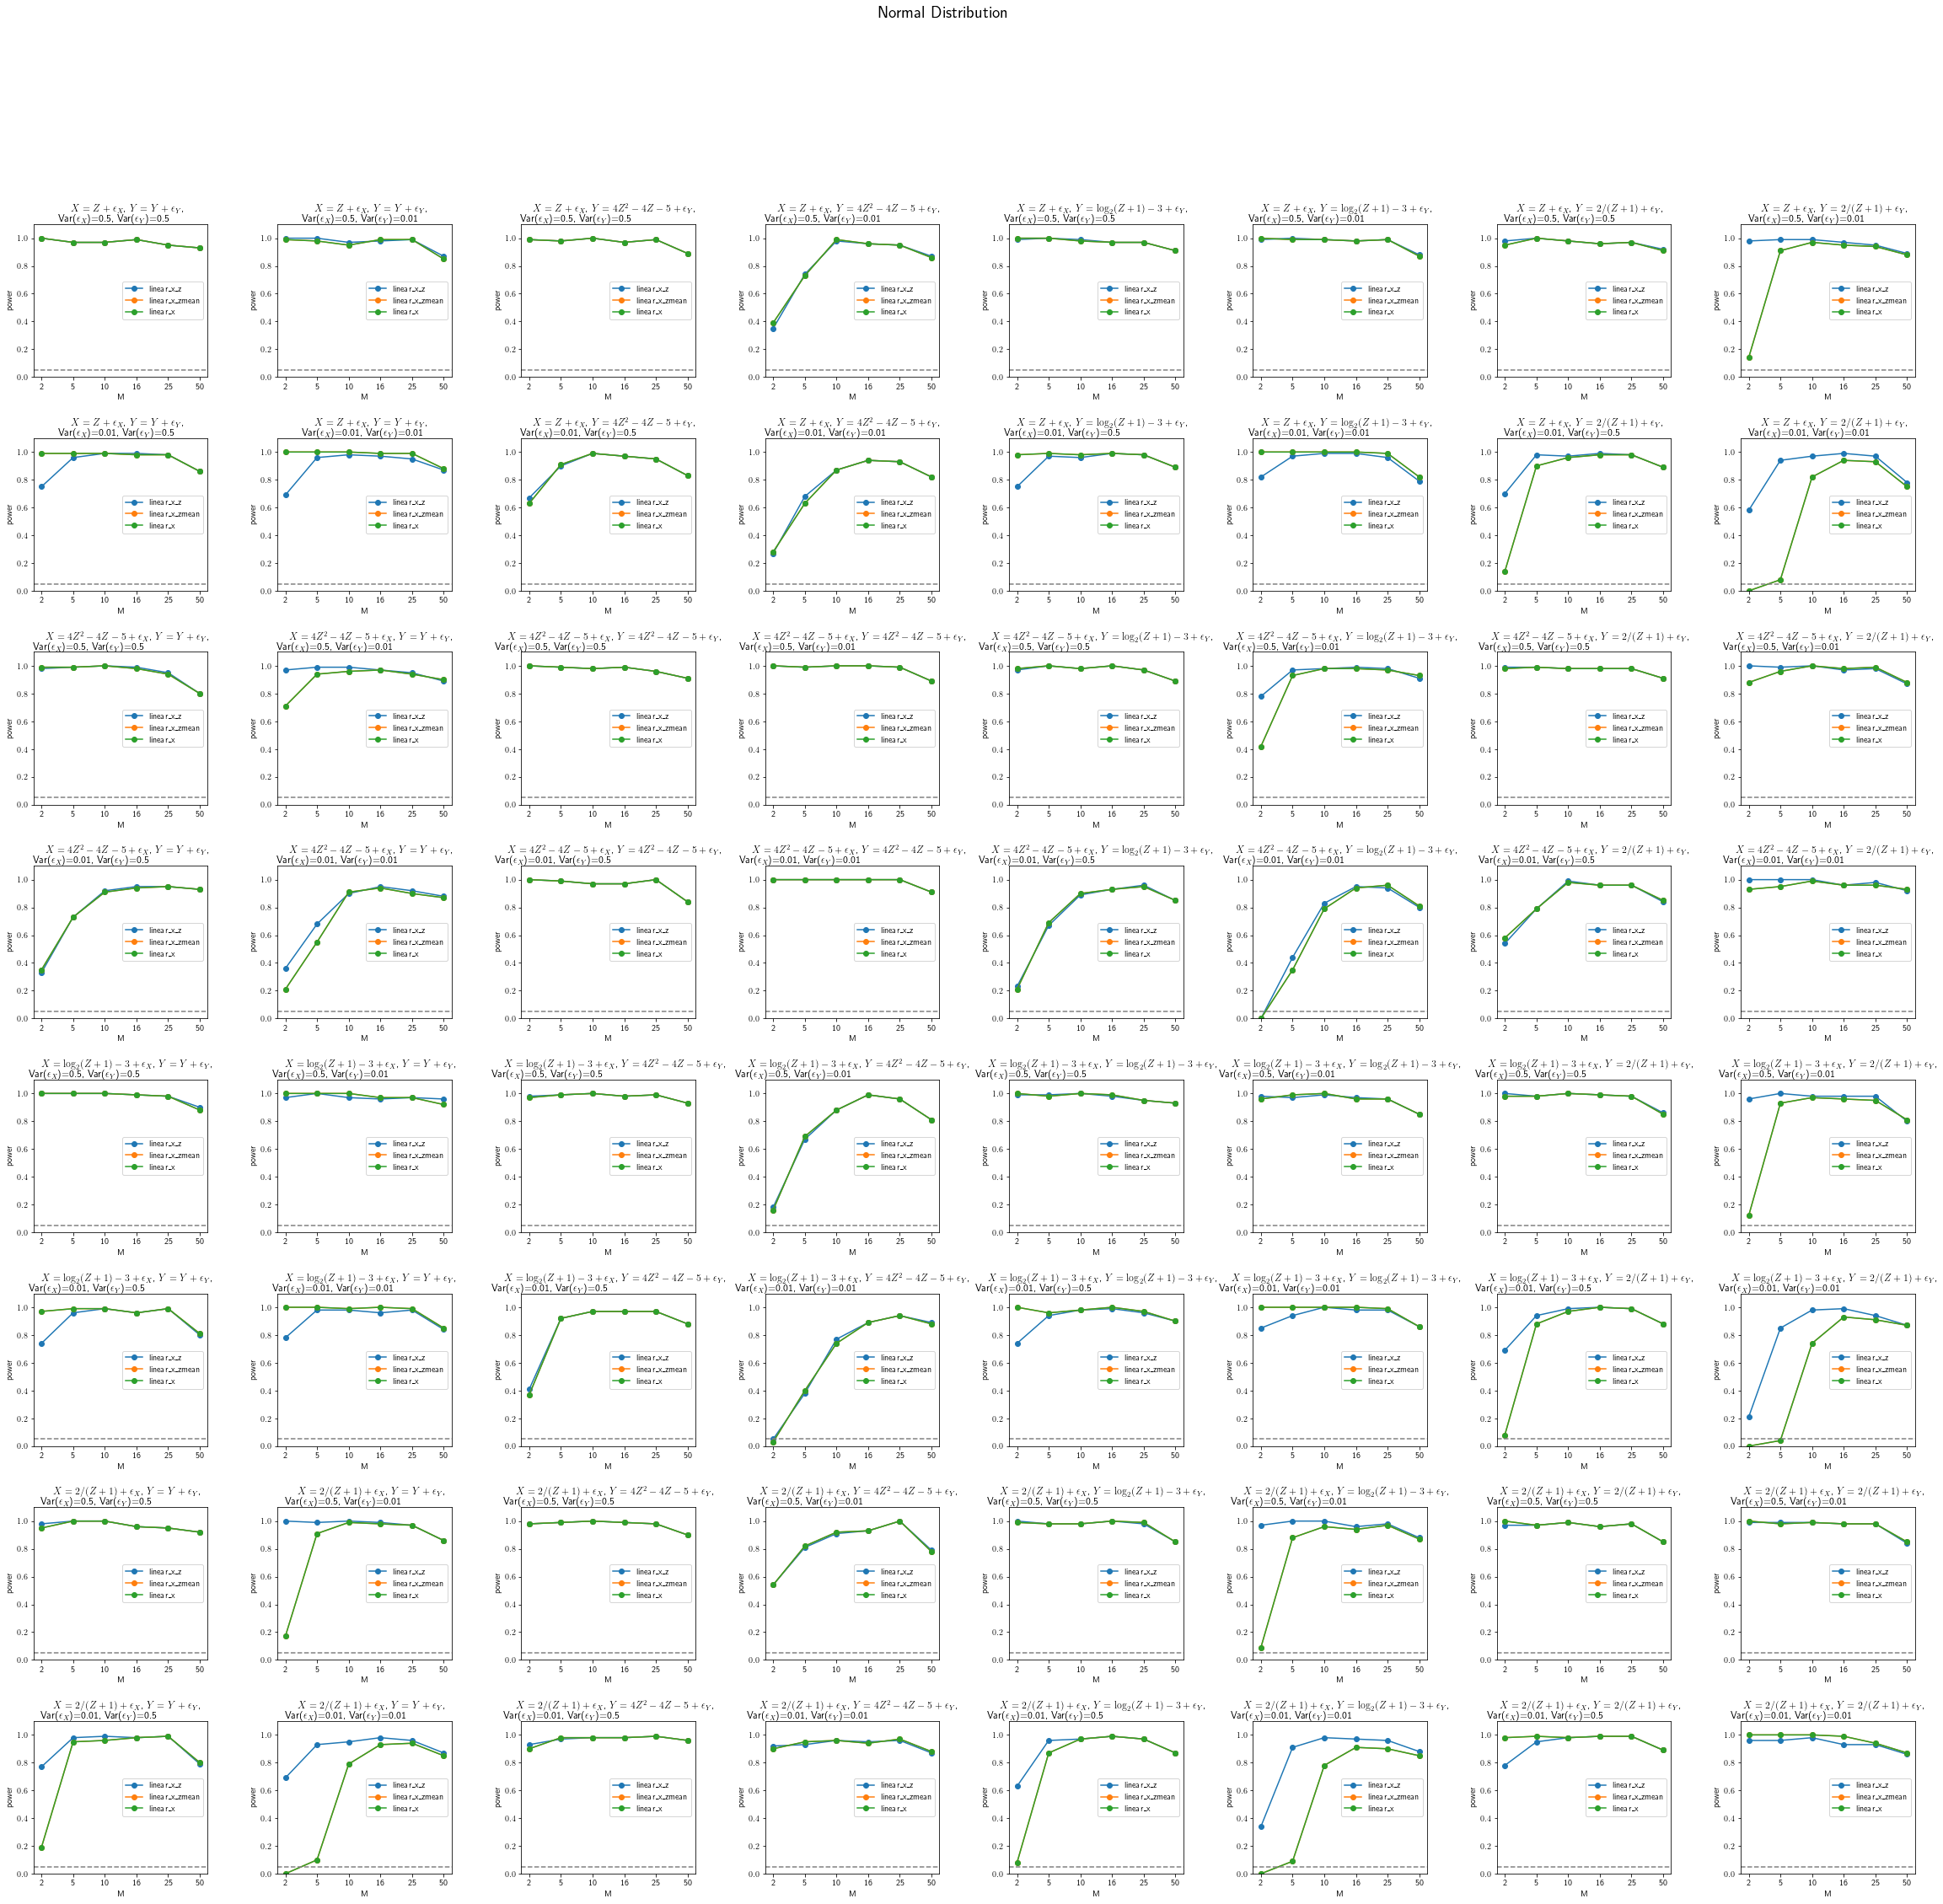

In [48]:
types = "normal"
hs = 'h1'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(40, 36))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(4):
    for yf in range(4):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(8, 8, xf*16+vx1*8+yf*2+vy1+1)
                result = pd.read_csv("./results/result_m32_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:3,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
plt.show()

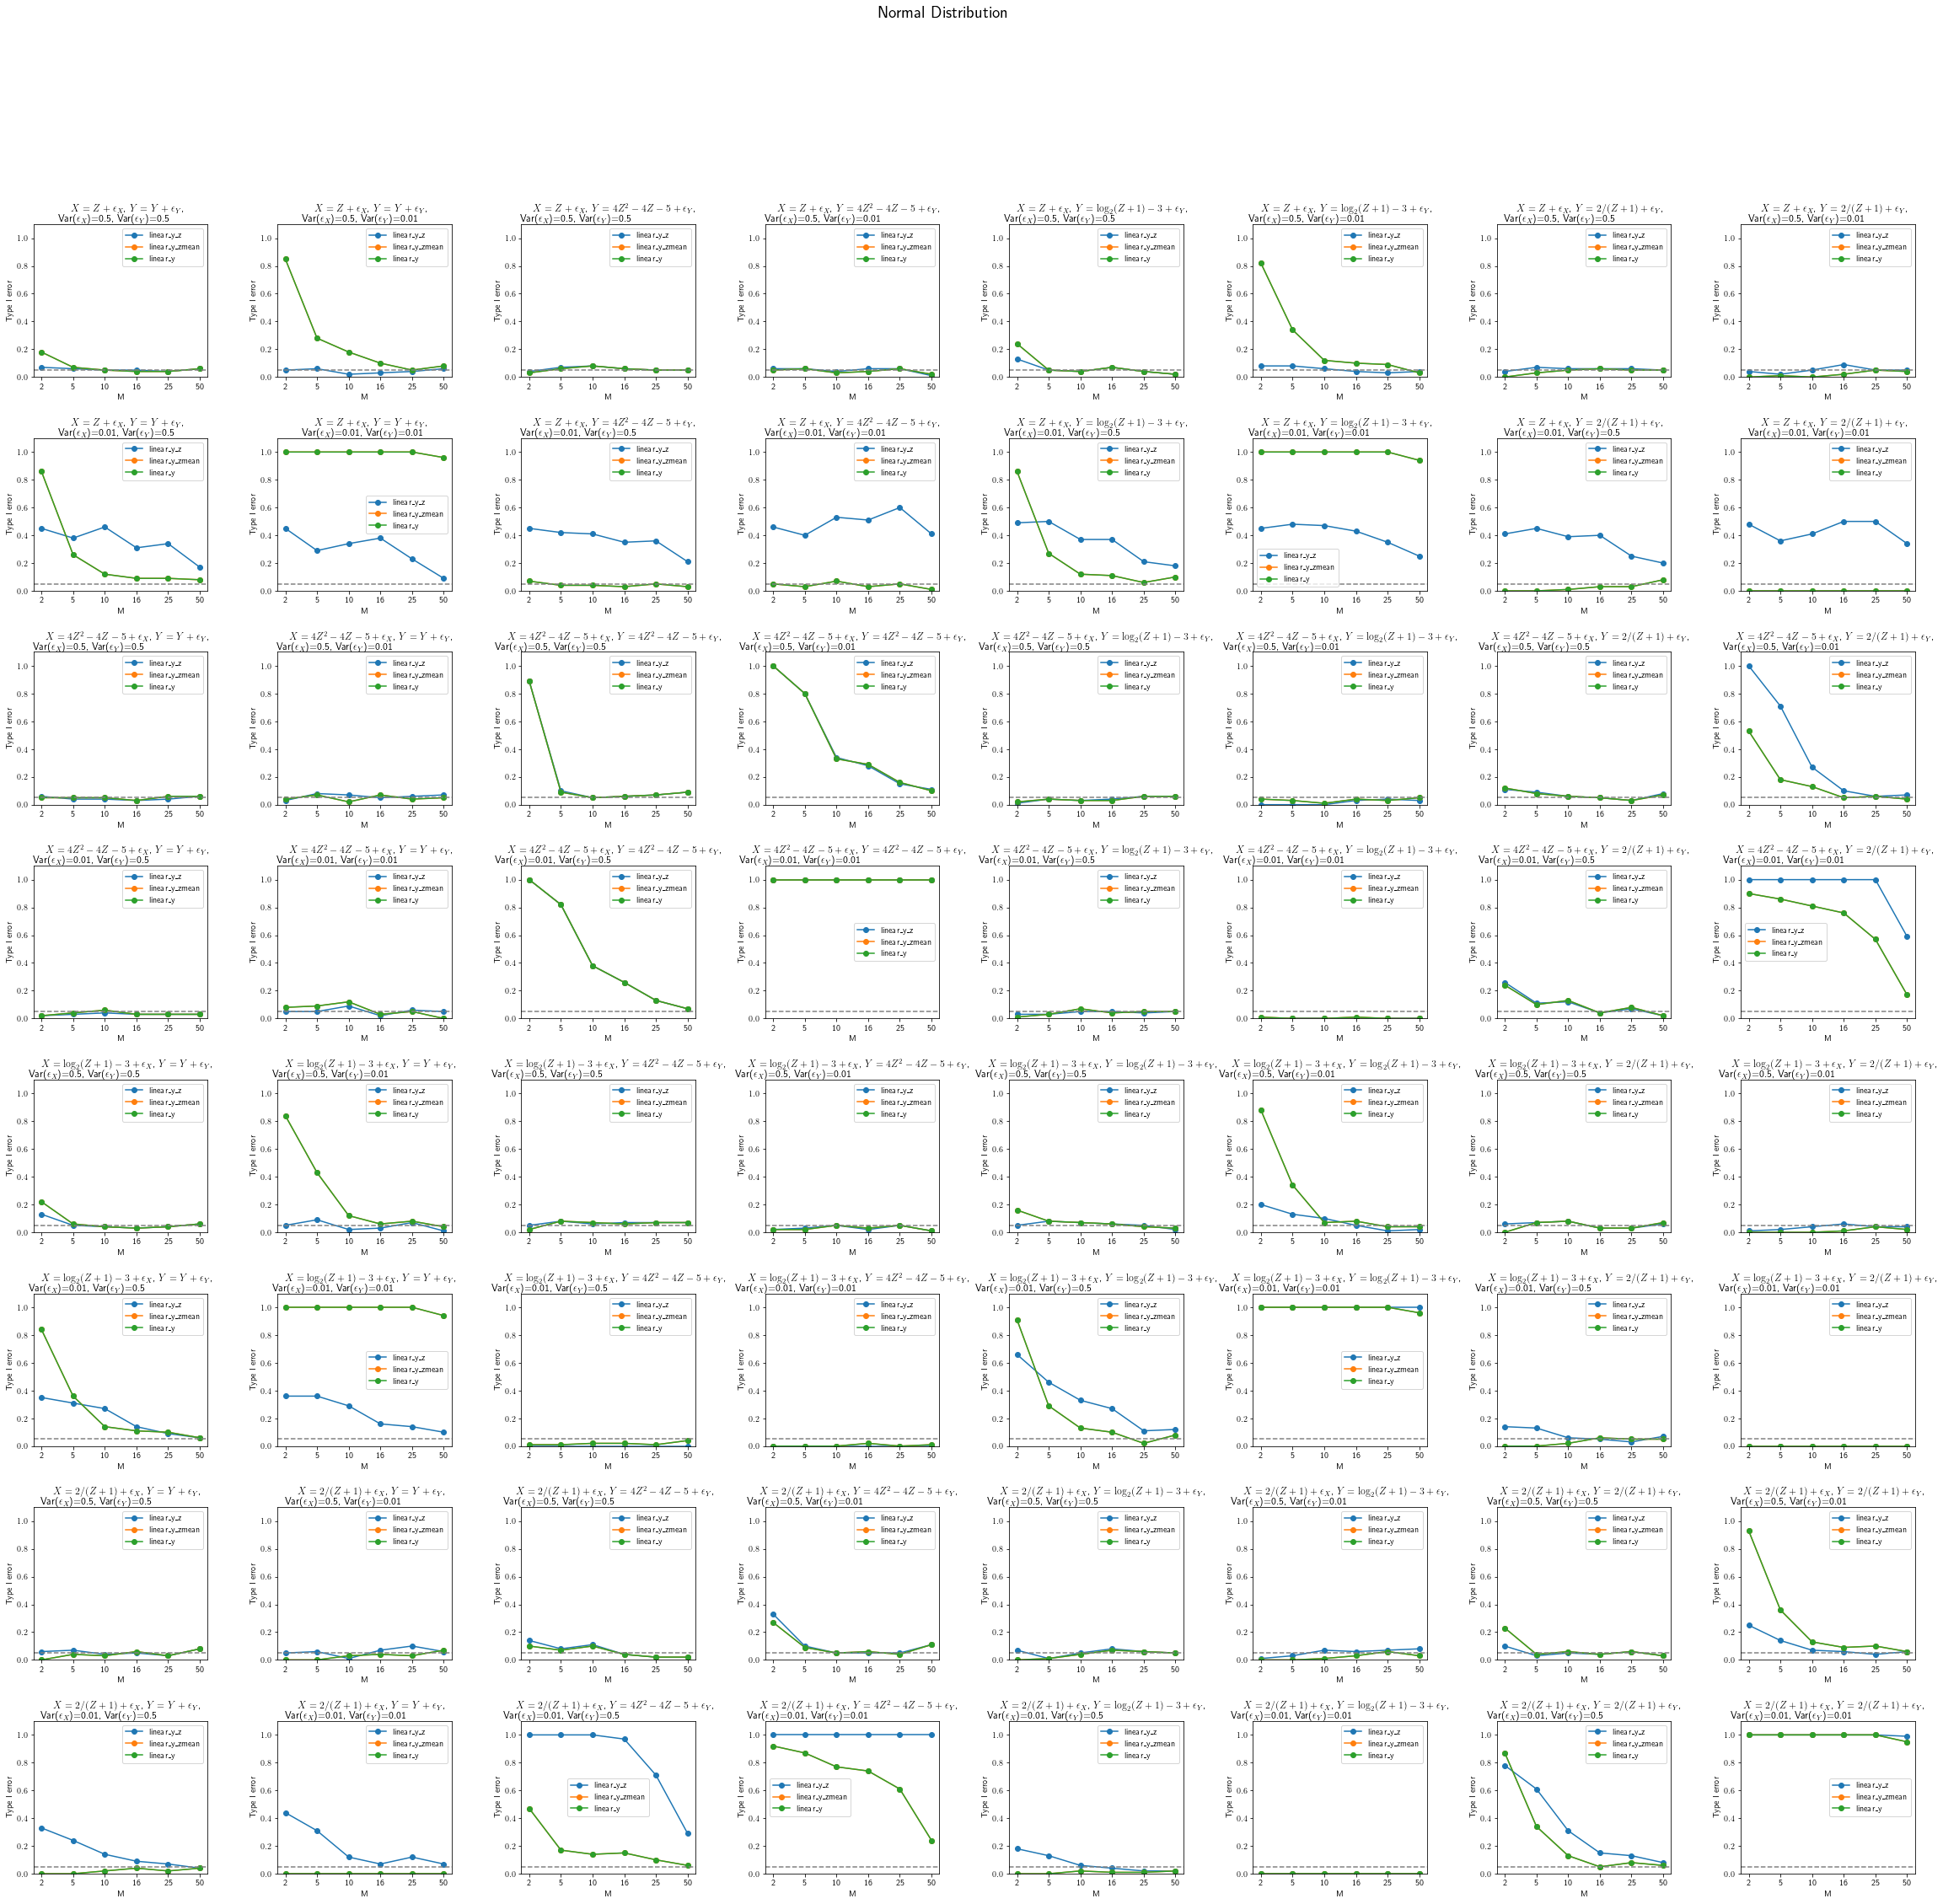

In [49]:
types = "normal"
hs = 'h0'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(40, 36))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(4):
    for yf in range(4):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(8, 8, xf*16+vx1*8+yf*2+vy1+1)
                result = pd.read_csv("./results/result_m32_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[3:,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
#plt.savefig("./results/4func_p5.jpg")
plt.show()

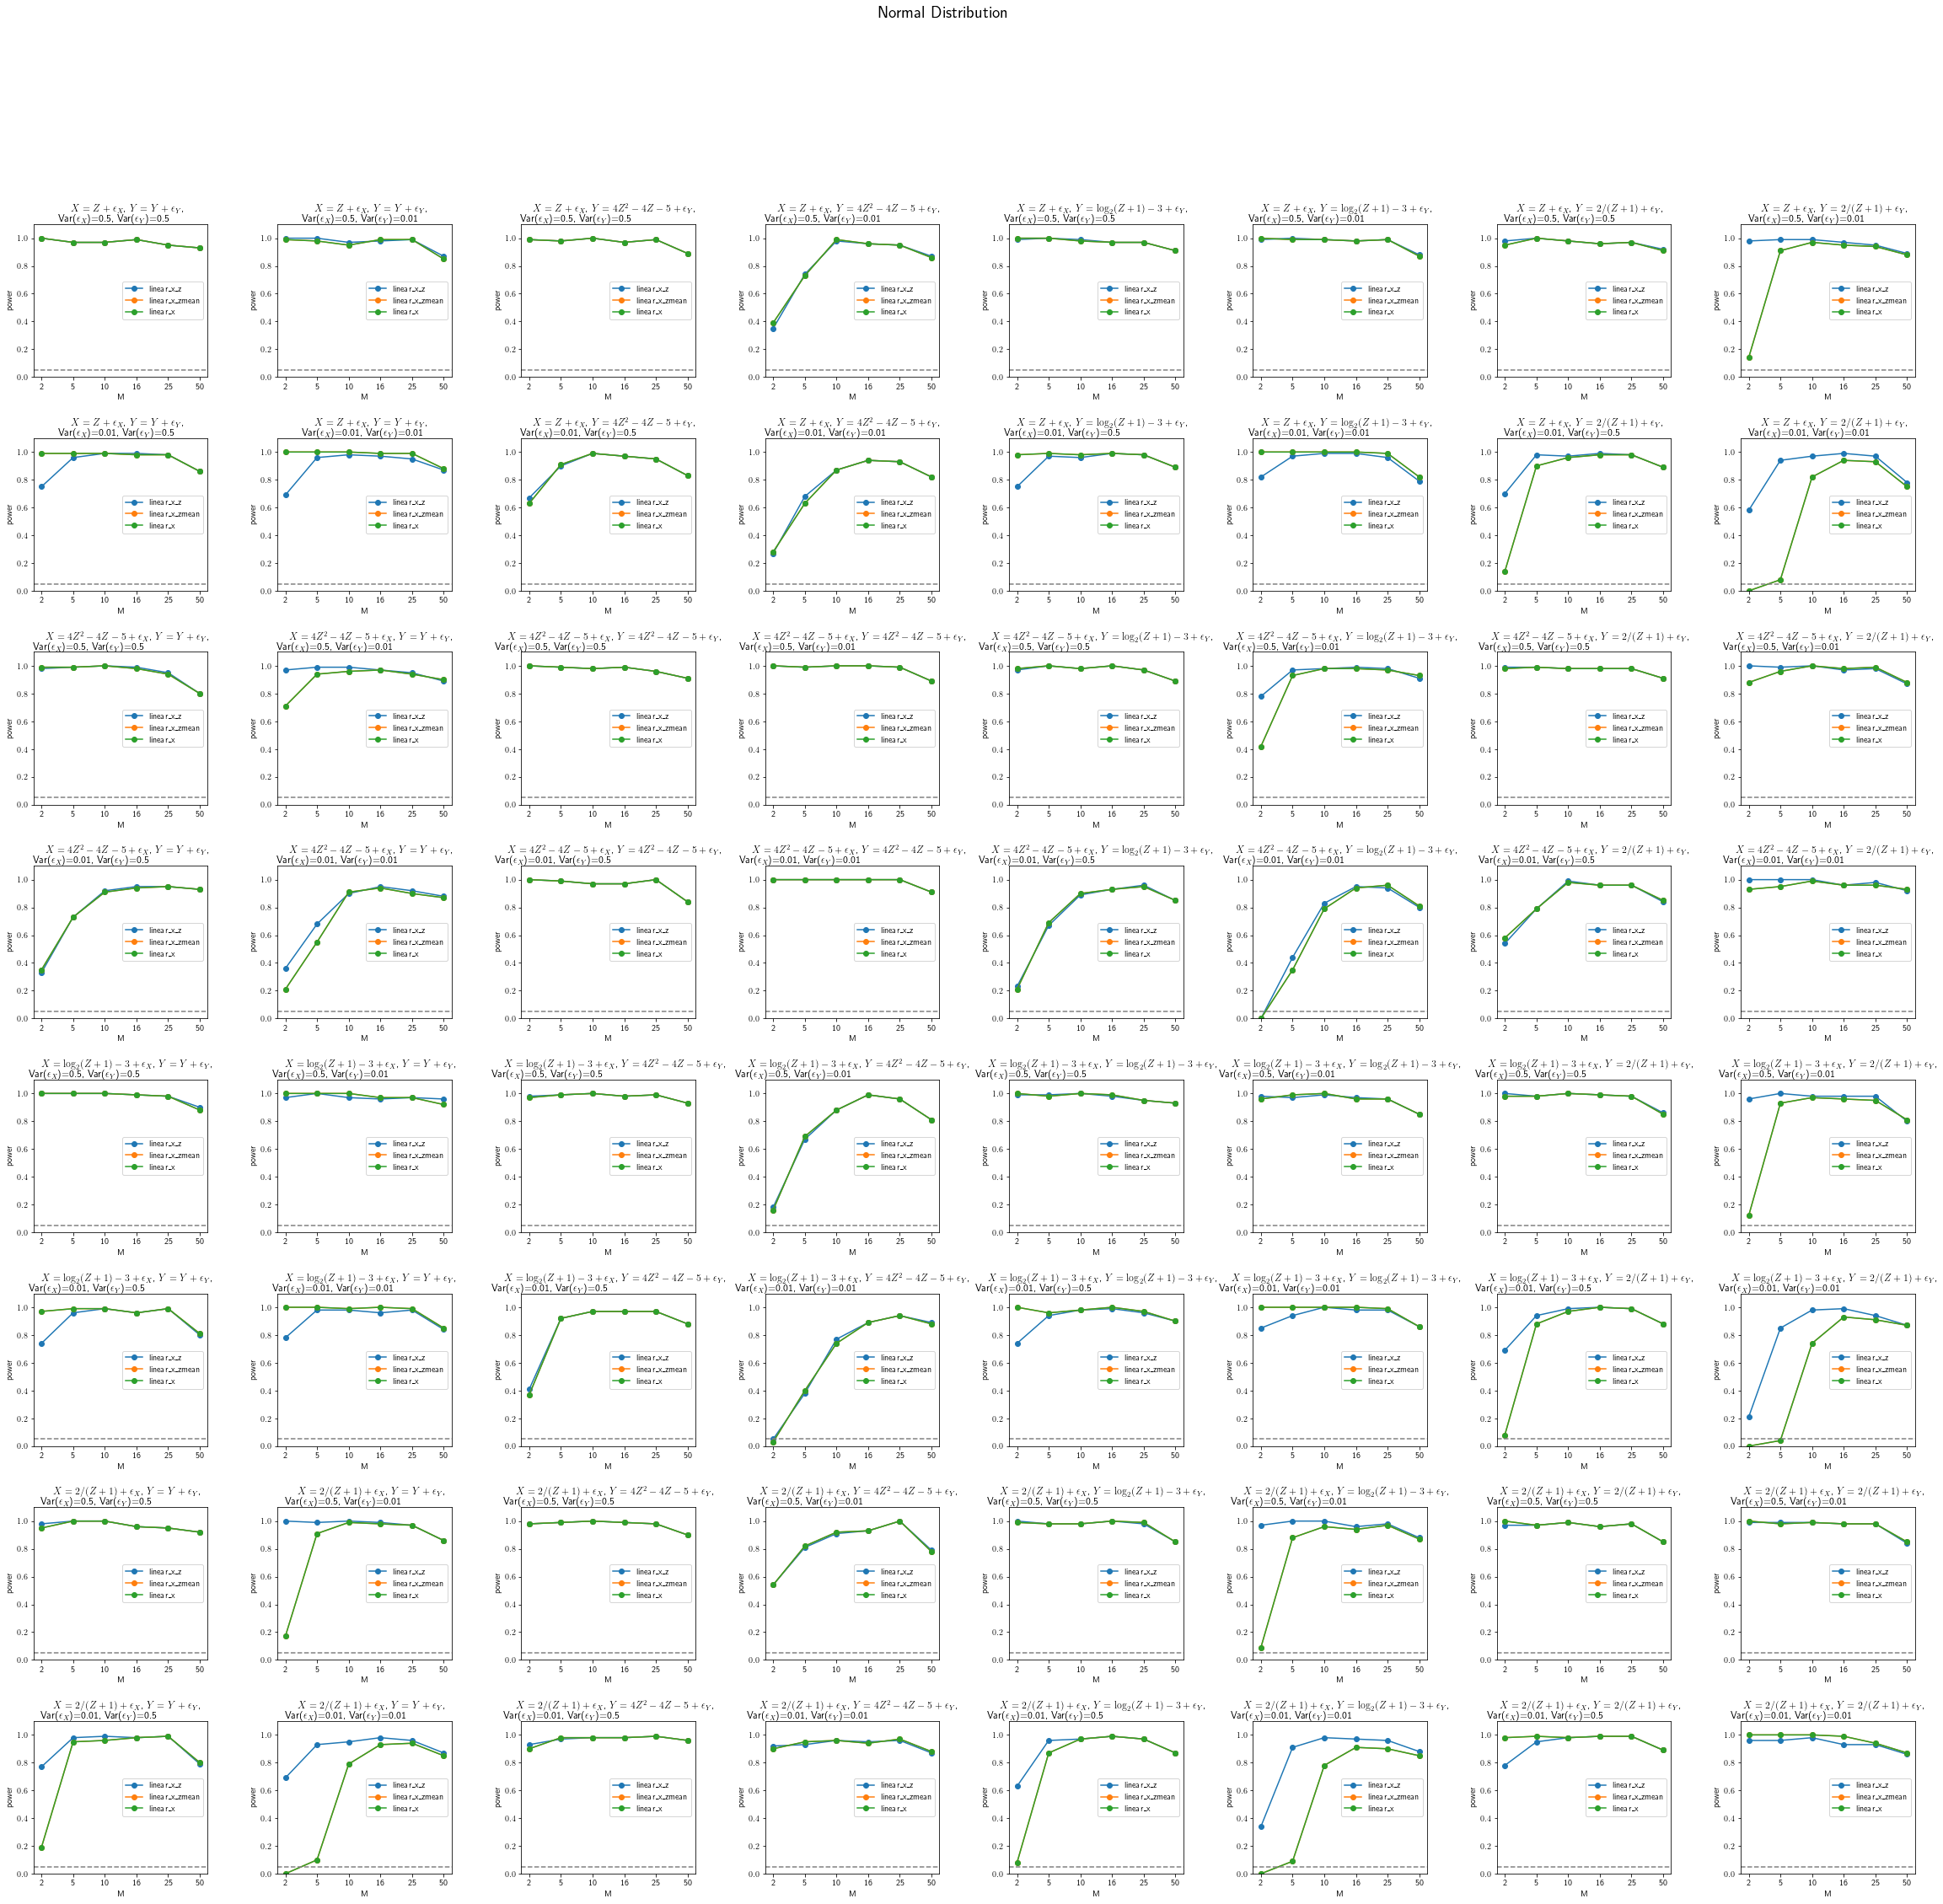

In [50]:
types = "normal"
hs = 'h1'
vxs = [0.5, 0.01]
vys = [0.5, 0.01]
xfuns = ['$X = Z + \epsilon_X$', '$X = 4Z^2 - 4Z-5 + \epsilon_X$', '$X = \log_2(Z+1)-3 + \epsilon_X$', '$X = 2/(Z+1) + \epsilon_X$']
yfuns = ['$Y = Y + \epsilon_Y$', '$Y = 4Z^2 - 4Z-5 + \epsilon_Y$', '$Y = \log_2(Z+1)-3 + \epsilon_Y$', '$Y = 2/(Z+1)  + \epsilon_Y$']
plt.figure(figsize=(40, 36))
plt.subplots_adjust(wspace=.4, hspace=.4)
for xf in range(4):
    for yf in range(4):
        for vx1 in range(len(vxs)):
            for vy1 in range(len(vys)):
                plt.subplot(8, 8, xf*16+vx1*8+yf*2+vy1+1)
                result = pd.read_csv("./results/result_m32_x_func_"+str(xf)+"_"+str(yf)+"_var_"+str(vxs[vx1])+"_"+str(vys[vy1])+"_"+hs+"_"+types+".csv", index_col=0)
                result = result.iloc[:3,:]
                plt.plot(result.T, '-o')
                plt.xlabel("M")
                if hs == "h0":
                    plt.ylabel("Type I error")
                else:
                    plt.ylabel("power")
                plt.legend(result.index)
                plt.ylim([0, 1.1])
                plt.axhline(y=0.05, color='grey', linestyle='--')
                plt.rcParams['text.usetex'] = True
                plt.title(r"{}, {}, $\\$ Var($\epsilon_X$)={}, Var($\epsilon_Y$)={}".format(xfuns[xf], yfuns[yf], vxs[vx1], vys[vy1]))
fig = plt.gcf()
fig.suptitle("Normal Distribution", fontsize=20)
#plt.savefig("./results/4func_p6.jpg")
plt.show()